# Youtube trend reflects public interest 

Videos that are on YouTube trending page changes everyday and it is a reflection of what is happening in the world and the popular topics people are discussing at the time. At the time of this analysis, democratic and republican national convention just happened and the trailer for the new Batman movie was released.

I analyzed data from 4 English speaking countries (US, Australia, Canada, Great Britan) in detail to see what kinds of videos and channels are trending at this time (08/26/2020-09/04/2020). 

<b>Observations and Conclusions</b>

<b>There were large changes in the content of videos trending from one day to the next.</b>  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* For the "News & Politics" category, on 8/26/20, top words used as title and tags were "Trump" & "republican", while on 8/27/20, they were "hurricane" and "laura"." This suggests the shift in people's interest from the politacal party conventions to Hurricane Laura in Texas.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* For the "Entertainment" category, videos of the same topic trended for days at a time. For instance, many videos related to the Batman trailer (released on 8/22/20) were trending until 8/28/20, and many videos on Chadwick Boseman (passed away on 8/28/20) were trending on 09/04/20 (6 days after the news). 
    
<b>The videos trending were related to topics with high indecies for interest over time on Google.</b>  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* Interest for any word peaked almost immediately (within 2 days) after the incident (RNC, shooting of Jacob Blake, Chadwick Boseman's death...etc.) or release of movie trialers.<br>
        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* The videos trending were published right when the interest for topic peaks on google, but those videos get on the trending page on average 3 days later and stay on the trending page for about xxx (?) days. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* There is a trend for correlation between the interest score on google and the number of videos there on the trending page 3 days later for a key word (p =0.99) <br>
    
<b>What kinds of channels produces trending videos?</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Channels by large coorperations. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * This is expected. The videos from these channels were either starting the trend (release of a movie trailer or video or videos political conventions) or produce videos very fast on a popular topic.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Channels with large followings. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * As also expected, channels with large followings (5M<) had multiple trending videos. Examples are 'James Charles' and 'emma chamberlain'.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * However, they (especially James Charles) are also good at picking topics that are high of interest (purchasing homes, people who are popular at the moment).<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Channels that cover popular topics. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * For days I covered, the channel 'The United Stand' (800k subscribers) who covers information on 'Manchester United' (English football/soccer team) had 15 trending videos (2 or more trending every day). Interest over time for the search term 'Manchester United' is very high. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * Other small channels (<1.5M subscribers. E.g.  SafferonBarkerVlogs) also had multiple trending videos, and their videos had tags or titles with high google interest ('dream house', 'road trip') and had similar titles as other trending videos ('I bought my dream house!!' by SafferonBarkerVlogs vs. 'I Bought My First Home! 2020 House Tour' by James Charles (21M subscribers).<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * As stated above, other examples are videos on popular topics related to news outbreaks.<br>


Miley Cyrus
Celtics
David Blaine
Nuggets
Monica
Leonard Fournette






Using this script to download new data
https://github.com/mitchelljy/Trending-YouTube-Scraper

Run this on jupyter notebook:
%run -i 'scraper.py'
Then change directory. And move all csv files to new directory.

## Data preparation

In [1]:
# Import packages
import os 
import pandas as pd
import glob
from datetime import datetime
from plotnine import *
import json
from pandas.io.json import json_normalize 
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from io import StringIO
import collections
import numpy as np
from matplotlib import rcParams
import matplotlib.cm as cm

In [3]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import datetime
from datetime import datetime, date, time


from pytrends.request import TrendReq

import datetime
from dateutil.relativedelta import relativedelta


In [162]:
# Get file names
filenames = [i for i in glob.glob('*videos.{}'.format('csv'))]

In [163]:
# Run this instead to get file names for specific date
# filenames = [i for i in glob.glob('20.27.08'+'*.{}'.format('csv'))]

In [164]:
filenames

['20.04.09_GB_videos.csv',
 '20.29.08_GB_videos.csv',
 '20.27.08_CA_videos.csv',
 '20.26.08_JP_videos.csv',
 '20.01.09_CA_videos.csv',
 '20.03.09_AU_videos.csv',
 '20.03.09_US_videos.csv',
 '20.27.08_IN_videos.csv',
 '20.05.09_CA_videos.csv',
 '20.26.08_DE_videos.csv',
 '20.26.08_GB_videos.csv',
 '20.29.08_IN_videos.csv',
 '20.05.09_GB_videos.csv',
 '20.06.09_US_videos.csv',
 '20.06.09_AU_videos.csv',
 '20.26.08_CA_videos.csv',
 '20.04.09_CA_videos.csv',
 '20.26.08_IN_videos.csv',
 '20.02.09_US_videos.csv',
 '20.02.09_AU_videos.csv',
 '20.29.08_CA_videos.csv',
 '20.27.08_GB_videos.csv',
 '20.26.08_FR_videos.csv',
 '20.01.09_GB_videos.csv',
 '20.03.09_CA_videos.csv',
 '20.05.09_US_videos.csv',
 '20.27.08_MX_videos.csv',
 '20.05.09_AU_videos.csv',
 '20.06.09_GB_videos.csv',
 '20.02.09_GB_videos.csv',
 '20.27.08_US_videos.csv',
 '20.27.08_AU_videos.csv',
 '20.01.09_US_videos.csv',
 '20.01.09_AU_videos.csv',
 '20.26.08_MX_videos.csv',
 '20.04.09_AU_videos.csv',
 '20.04.09_US_videos.csv',
 

In [165]:
# Extract columnnames
df = pd.read_csv(filenames[0])
columnnames = df.columns
# Create empty dataframe
videos = pd.DataFrame(columns = columnnames)
for f in filenames:
    d = pd.read_csv(f) 
    country = f[9:11] # Get country code from each filename
    d['Country'] = country # Add a column with country code
    videos = pd.concat([videos,d])
# Reset index
videos.reset_index(drop=True, inplace=True)

In [8]:
# Run this to export to excel
#videos.to_excel( "videos.xls", index=False, encoding='utf-8-sig')

Use this to get category code for each coutnry. https://developers.google.com/youtube/v3/docs/videoCategories/list

For US: 
part = id,snippet
regionCode: us

keep everything else empty.
Copy and paste into txt.app save as .json(in the same folder) for every country.

In [9]:
jsonfilenames = [i for i in glob.glob('categoryId_*.{}'.format('json'))]

In [10]:
jsonfilenames

['categoryId_AU.json',
 'categoryId_FR.json',
 'categoryId_IN.json',
 'categoryId_CA.json',
 'categoryId_JP.json',
 'categoryId_BR.json',
 'categoryId_DE.json',
 'categoryId_RU.json',
 'categoryId_MX.json',
 'categoryId_GB.json',
 'categoryId_US.json',
 'categoryId_KR.json']

In [11]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
categoryIDs = pd.DataFrame(columns = ['id','snippet.title'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['items']) # Get a table from the last column
    df2 = df.loc[:,('id','snippet.title')] # Extract only id and category name
    country = f[11:13] # Get country code
    df2['Country'] = country # Add to a column
    categoryIDs = categoryIDs.append(df2)
categoryIDs.columns = ['id','Category','Country'] # Rename columns
categoryIDs.reset_index(drop=True, inplace=True)

In [12]:
categoryIDs

id          Category Country
0     1  Film & Animation      AU
1     2  Autos & Vehicles      AU
2    10             Music      AU
3    15    Pets & Animals      AU
4    17            Sports      AU
..   ..               ...     ...
368  40    Sci-Fi/Fantasy      KR
369  41          Thriller      KR
370  42            Shorts      KR
371  43             Shows      KR
372  44          Trailers      KR

[373 rows x 3 columns]

In [13]:
# Check if there's any missing values in categoryId column
print(videos['categoryId'].isnull().values.any())

False


In [14]:
videos

video_id                                              title  \
0     3CxtK7-XtE0  DJ Khaled ft. Drake - POPSTAR (Official Music ...   
1     ZBEEdzZH4QY  Timo Werner's opening goal cancelled out by Ga...   
2     vw2FOYjCz38                         NO TIME TO DIE | Trailer 2   
3     qJlMkMtK7-8  SZA - Hit Different (Official Video) ft. Ty Do...   
4     s_UcjEq2Dgk          Super Mario Bros. 35th Anniversary Direct   
...           ...                                                ...   
8722  JijFLcbIqMs  WATCH: Kamala Harris’ full speech at the 2020 ...   
8723  -b77ys1WLtU             Reacting To The 2020 NBA Draft Lottery   
8724  Y4nEquUuKz0  EXCLUSIVE NEWS: The Crown Season 4 Release Dat...   
8725  e1tOrEewEwk                        Sonic JoJo: Sonic vs Shadow   
8726  B14KGvONHT0  David Dobrik’s Vlog Squad Get Blasted on the D...   

               publishedAt                 channelId          channelTitle  \
0     2020-09-04T04:15:41Z  UCrFB54bqp8sda4udJyNswlA          DJKhaledVEVO   
1     2020-09-03T21:29:53Z  UCNAf1k0yIjyGu3k9BwAg3lg   Sky Sports Football   
2     2020-09-03T11:00:01Z  UCwTkM6CvIsYFaFiMKIKCqHw        James Bond 007   
3     2020-09-04T04:00:09Z  UCKzhoblE_rPZbHtQKPVUp2A               SZAVEVO   
4     2020-09-03T13:00:12Z  UCGIY_O-8vW4rfX98KlMkvRg              Nintendo   
...                    ...                       ...                   ...   
8722  2020-08-20T03:41:13Z  UC6ZFN9Tx6xh-skXCuRHCDpQ          PBS NewsHour   
8723  2020-08-21T01:44:43Z  UCRGhaM_Dfh_iNL3yqQ0LYxg          Extra Krispy   
8724  2020-08-20T14:00:00Z  UCGie8GMlUo3kBKIopdvumVQ  Netflix UK & Ireland   
8725  2020-08-20T16:33:15Z  UCCn62cYVpl0e_GN-yo1H9yQ                mashed   
8726  2020-08-19T16:00:12Z  UCqOoboPm3uhY_YXhvhmL-WA             Discovery   

     categoryId trending_date  \
0            10      20.04.09   
1            17      20.04.09   
2             1      20.04.09   
3            10      20.04.09   
4            20      20.04.09   
...         ...           ...   
8722         25      20.26.08   
8723         17      20.26.08   
8724         24      20.26.08   
8725         20      20.26.08   
8726         24      20.26.08   

                                                   tags view_count   likes  \
0     Father Of Ashad|Ashad|I'm the One|No Brainer|g...    4695001  563584   
1     sky sports|premier league|Football League|foot...     406225    7230   
2     James Bond|007|Daniel Craig|Bond film|Rami Mal...    3045249   62055   
3     sza|ty dolla $ign|hit different|new sza|sxa 20...     907524  141386   
4     nintendo|play|play nintendo|game|gameplay|fun|...    4938620  280847   
...                                                 ...        ...     ...   
8722  dnc|democratic national convention|joe biden|v...     913674   13340   
8723                                             [none]     170452    9859   
8724  The Crown|Netflix|Olivia Colman|Peter Morgan|Q...     855059   10095   
8725  sonic|sonic the hedgehog|shadow|shadow the hed...     890862   52030   
8726  david dobrik|dodgeball|vlog squad|obstacle cou...    1805268   52619   

     dislikes comment_count                                  thumbnail_link  \
0       16937         39915  https://i.ytimg.com/vi/3CxtK7-XtE0/default.jpg   
1          96          1135  https://i.ytimg.com/vi/ZBEEdzZH4QY/default.jpg   
2        1499          5422  https://i.ytimg.com/vi/vw2FOYjCz38/default.jpg   
3         794         12537  https://i.ytimg.com/vi/qJlMkMtK7-8/default.jpg   
4        7651         46201  https://i.ytimg.com/vi/s_UcjEq2Dgk/default.jpg   
...       ...           ...                                             ...   
8722     7081             0  https://i.ytimg.com/vi/JijFLcbIqMs/default.jpg   
8723      494          2000  https://i.ytimg.com/vi/-b77ys1WLtU/default.jpg   
8724      198           856  https://i.ytimg.com/vi/Y4nEquUuKz0/default.jpg   
8725     1622          4059  https://i.ytimg.com/vi/e1tOrEewEwk/default.jpg   
8726

In [15]:
# Find cases where category name is not found in the category ID list for some reason
idfalse = []
rows = range(len(videos))
for r in rows:
    # Extract category Id for row
    Id = videos.loc[r,'categoryId']
    Id = f'{Id}' # Convert number to string
    # Find country code for row
    ct = videos.loc[r,'Country']
    # Find the row with the country and category id info in categoryID dataframe
    row = categoryIDs[(categoryIDs.id == Id)&(categoryIDs.Country == ct)]
    # Get the row index and use it find category name in categoryID dataframe
    # Insert 'unknown' if category doesn't exist
    if any(row['id']) == True:
        continue
    elif any(row['id']) == False:
        idx = videos.index.get_loc(videos.iloc[r].name)
        idfalse.append(idx)
idfalse

[1049, 1485, 1734, 2356, 2907, 3072, 4474, 5109, 6481, 7478, 7557, 8023]

In [166]:
categories = []
rows = range(len(videos))
for r in rows:
    # Extract category Id for row
    Id = videos.loc[r,'categoryId']
    Id = f'{Id}' # Convert number to string
    # Find country code for row
    ct = videos.loc[r,'Country']
    # Find the row with the country and category id info in categoryID dataframe
    row = categoryIDs[(categoryIDs.id == Id)&(categoryIDs.Country == ct)]
    # Get the row index and use it find category name in categoryID dataframe
    # Insert 'unknown' if category doesn't exist
    if any(row['id']) == True:
        idx = categoryIDs.index.get_loc(row.iloc[0].name)
        category = categoryIDs.loc[idx,'Category']
    elif any(row['id']) == False:
        category = 'unknown'
    # Append infomation in categories 
    categories.append(category)
# Convert to dataframe
categories = pd.DataFrame(categories)
# Append to videos dataframe and name it videos2
videos2 = pd.concat([videos,categories],axis=1)

In [167]:
# Rename columns (add 'category' column name to original videos column names)
category = pd.Index(['categories'])
columnnames = videos.columns
columnnames = columnnames.append(category)
videos2.columns = columnnames

In [18]:
videos2.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count           object
likes                object
dislikes             object
comment_count        object
thumbnail_link       object
comments_disabled    object
ratings_disabled     object
description          object
Country              object
categories           object
dtype: object

In [168]:
# Convert colunms to float 
videos2['view_count'] = videos2['view_count'].astype(float)
videos2['likes'] = videos2['likes'].astype(float)
videos2['dislikes'] = videos2['dislikes'].astype(float)

In [20]:
# Trending video with lowest view count
mincount = min(videos2['view_count'])
videos2[(videos2.view_count == mincount)]

video_id                                         title  \
6168  WrOrjNvhVyA    [Full Event] ONE Championship: A NEW BREED   
7261  WrOrjNvhVyA  🔴 [Live in HD] ONE Championship: A NEW BREED   

               publishedAt                 channelId      channelTitle  \
6168  2020-08-28T15:13:21Z  UCiormkBf3jm6mfb7k0yPbKA  ONE Championship   
7261  2020-08-28T15:13:21Z  UCiormkBf3jm6mfb7k0yPbKA  ONE Championship   

     categoryId trending_date  \
6168         17      20.01.09   
7261         17      20.29.08   

                                                   tags  view_count  likes  \
6168  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...         0.0    0.0   
7261  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...         0.0    0.0   

      dislikes comment_count                                  thumbnail_link  \
6168       0.0           274  https://i.ytimg.com/vi/WrOrjNvhVyA/default.jpg   
7261       0.0           251  https://i.ytimg.com/vi/WrOrjNvhVyA/default.jpg   

     comments_disabled ratings_disabled  \
6168             False             True   
7261             False             True   

                                            description Country categories  
6168  ONE Championship will be coming to you LIVE fr...      AU     Sports  
7261  ONE Championship will be coming to you LIVE fr...      AU     Sports

In [169]:
# Make  a list of english speaking coutnries
eng_ct = ['US','AU','CA','GB']
# Create a dataframe with only videos from english speaking countries
english_vids = pd.DataFrame(columns = videos2.columns)
for e in eng_ct:
    df = videos2[(videos2.Country==e)]
    english_vids = pd.concat([english_vids,df])

In [170]:
# Some videos are counted multiple times because they are on the trending page for multiple countries
# Combine all videos that are the same 

In [171]:
group = english_vids.groupby(['title','channelTitle','categories','categoryId','trending_date','tags','publishedAt']).mean()
english_vids = group.reset_index()

In [24]:
# Dataset we are working with 
english_vids

title     channelTitle  \
0     #OFB Bandokay - Full Flick [Music Video] | GRM...        GRM Daily   
1                       #TDF2020 - Stage 1 - Highlights   Tour de France   
2                       #TDF2020 - Stage 1 - Highlights   Tour de France   
3                       #TDF2020 - Stage 1 - Highlights   Tour de France   
4                       #TDF2020 - Stage 2 - Highlights   Tour de France   
...                                                 ...              ...   
3402  😱WE WERE NEARLY MAROONED!  — Our island advent...  All 4 Adventure   
3403  😱WE WERE NEARLY MAROONED!  — Our island advent...  All 4 Adventure   
3404  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   
3405  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   
3406  😲MESSI QUITS BARCA!😲 Man City? PSG? Man Utd? J...          442oons   

            categories  categoryId trending_date  \
0                Music          10      20.26.08   
1               Sports          17      20.01.09   
2               Sports          17      20.02.09   
3               Sports          17      20.03.09   
4               Sports          17      20.01.09   
...                ...         ...           ...   
3402  Autos & Vehicles           2      20.01.09   
3403  Autos & Vehicles           2      20.02.09   
3404            Sports          17      20.01.09   
3405            Sports          17      20.27.08   
3406            Sports          17      20.29.08   

                                                   tags           publishedAt  \
0     Music|GRM|GRM Daily|Video|music video|pop musi...  2020-08-20T20:00:11Z   
1     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
2     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
3     VRE|0100|Nice Moyen Pays Nice|RLE|KRISTOFF Ale...  2020-08-29T18:41:32Z   
4     VRE|0200|Nice Haut Pays Nice|RLE|ALAPHILIPPE J...  2020-08-30T18:32:09Z   
...                                                 ...                   ...   
3402  All4Adventure|australia|4wd|4wd action|4x4|unl...  2020-08-27T05:00:12Z   
3403  All4Adventure|australia|4wd|4wd action|4x4|unl...  2020-08-27T05:00:12Z   
3404  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   
3405  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   
3406  funny|lol|parody|football|spoof|comedy|premier...  2020-08-26T18:32:59Z   

      view_count    likes  dislikes  
0       583831.0  30616.0     684.0  
1       176520.0   2937.0      50.0  
2       182840.0   2981.0      50.0  
3       186114.0   3007.0      50.0  
4       117732.0   2442.0      34.0  
...          ...      ...       ...  
3402     56286.0    909.0      14.0  
3403     59624.0    932.0      14.0  
3404   1770099.0  75233.0     927.0  
3405    948614.0  60859.0     615.0  
3406   1473727.0  71845.0     845.0  

[3407 rows x 10 columns]

In [25]:
# Check if there's any missing values
print(english_vids.isnull().values.any())

False


## Basics statistics of videos trending

### Plot 1: Categories of trending videos on 8/26/20-8/27/20 & 8/29/20

Text(0.5, 0, 'Count')

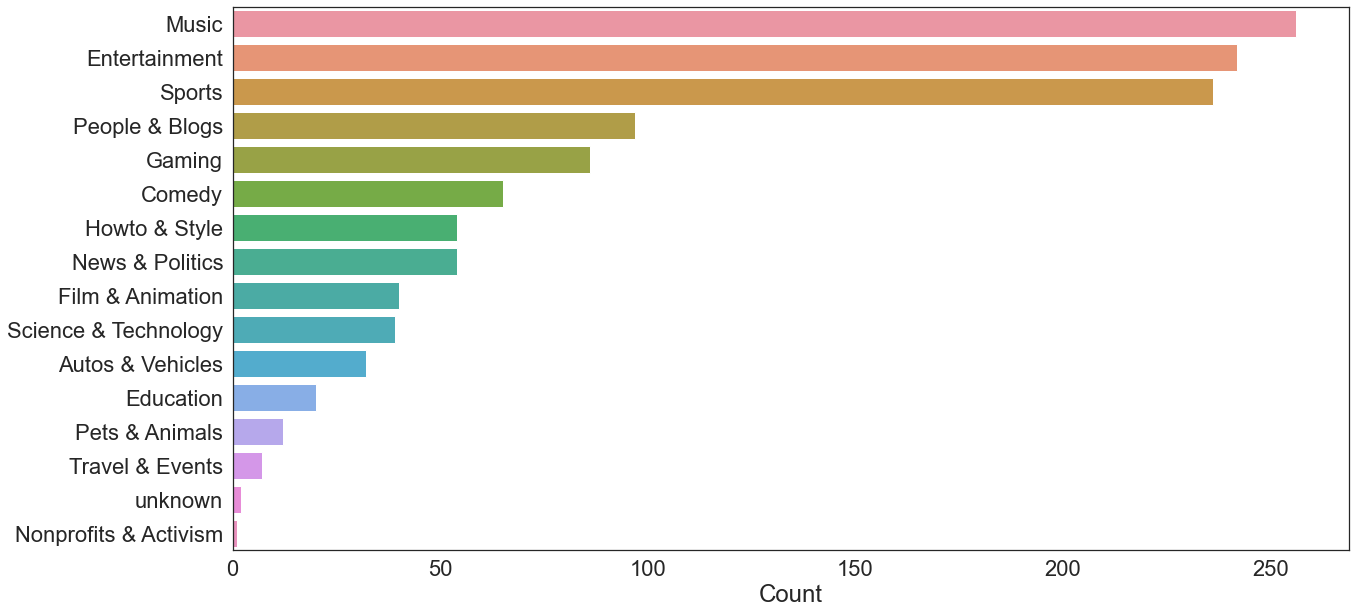

In [26]:
import seaborn as sns
from matplotlib import rcParams

# Some videos are listed multiple times because they are trending on different country's
# trending page
# Combine same duplicate rows
group = english_vids.groupby(['title','channelTitle','categories','categoryId','publishedAt','tags']).mean()
# Flatten labels
english_vidsall = group.reset_index()
# Set figure size
rcParams['figure.figsize'] = 20, 10
# Change font size
sns.set(font_scale=2)
# Make background white
sns.set_style("white")
# Count frequency
ax = sns.countplot(y="categories",data=english_vidsall, order = english_vidsall['categories'].value_counts().index)
# Change labels
ax.set_ylabel('')    
ax.set_xlabel('Count')


In [27]:
# Calculate log of dilikes and likes 
english_vids['logdis'] = np.log(english_vids['dislikes'])
english_vids['loglikes'] = np.log(english_vids['likes'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


### Plot 2: Distribution of likes and dislikes & categories

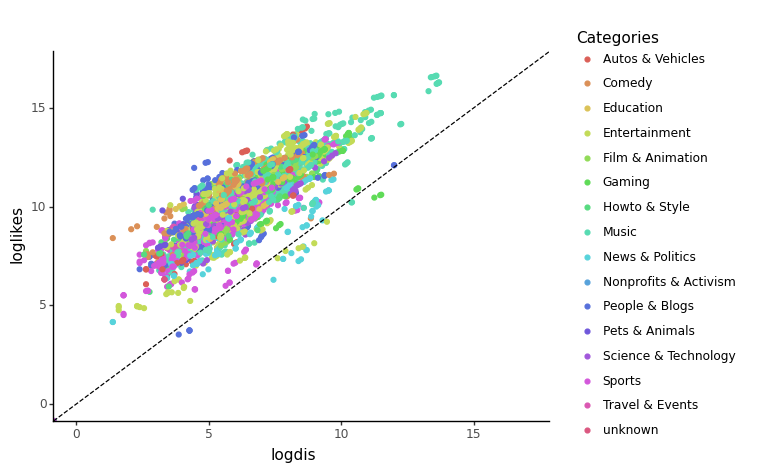

<ggplot: (7013985593)>

In [28]:
(ggplot(english_vids, aes(color='categories')) 
 + geom_point(aes(x='logdis',y='loglikes'))
 + theme_classic()
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
 + ylim(0,17)
 + xlim(0,17)
 + labs(color = 'Categories')
)
 

In [29]:
english_vids['total rating'] = english_vids['likes'] + english_vids['dislikes']
english_vids['logviews'] = np.log(english_vids['view_count'])
english_vids['lograting'] = np.log(english_vids['total rating'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


### Plot 3: Total rating vs views

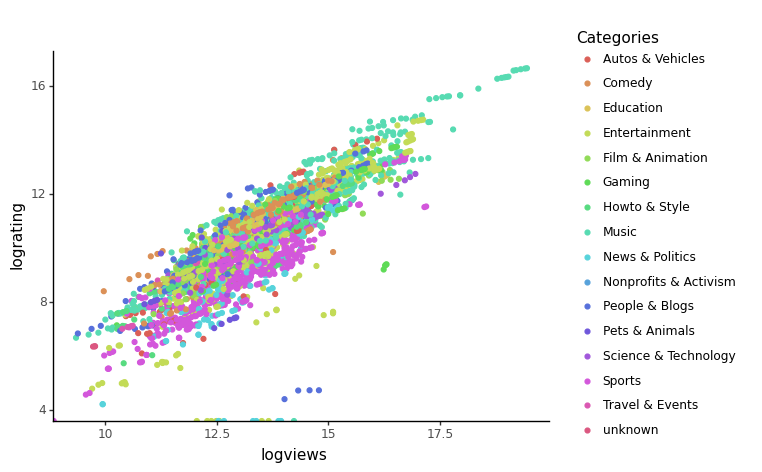

<ggplot: (7014305441)>

In [30]:
(ggplot(english_vids, aes(color='categories')) 
 + geom_point(aes(x='logviews',y='lograting'))
 + theme_classic()

 + labs(color = 'Categories')
)
 

### Plot 4 Ratings vs views for 'Entertainment' and 'News & Politics' categories

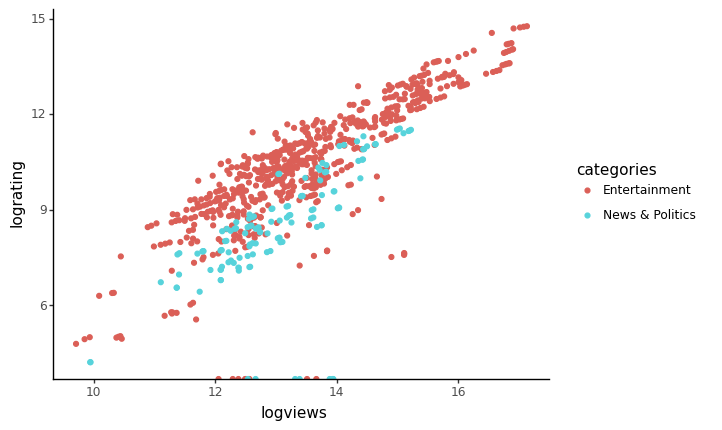

<ggplot: (7015330777)>

In [31]:
vids_e = english_vids[(english_vids.categories == 'Entertainment')]
vids_n = english_vids[(english_vids.categories == 'News & Politics')]
vids = vids_e.append(vids_n)
(ggplot(vids, aes(color='categories'))
 + geom_point(aes(x='logviews',y='lograting'))
 + theme_classic()
)
 

In [32]:
# Prepare data to create plot for channels producing multiple trending videos

# Count channel names using word counter
# Use combined df (no duplicates)
all_channels = english_vidsall['channelTitle']
counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

### Plot 5: Channels trending

<BarContainer object of 10 artists>

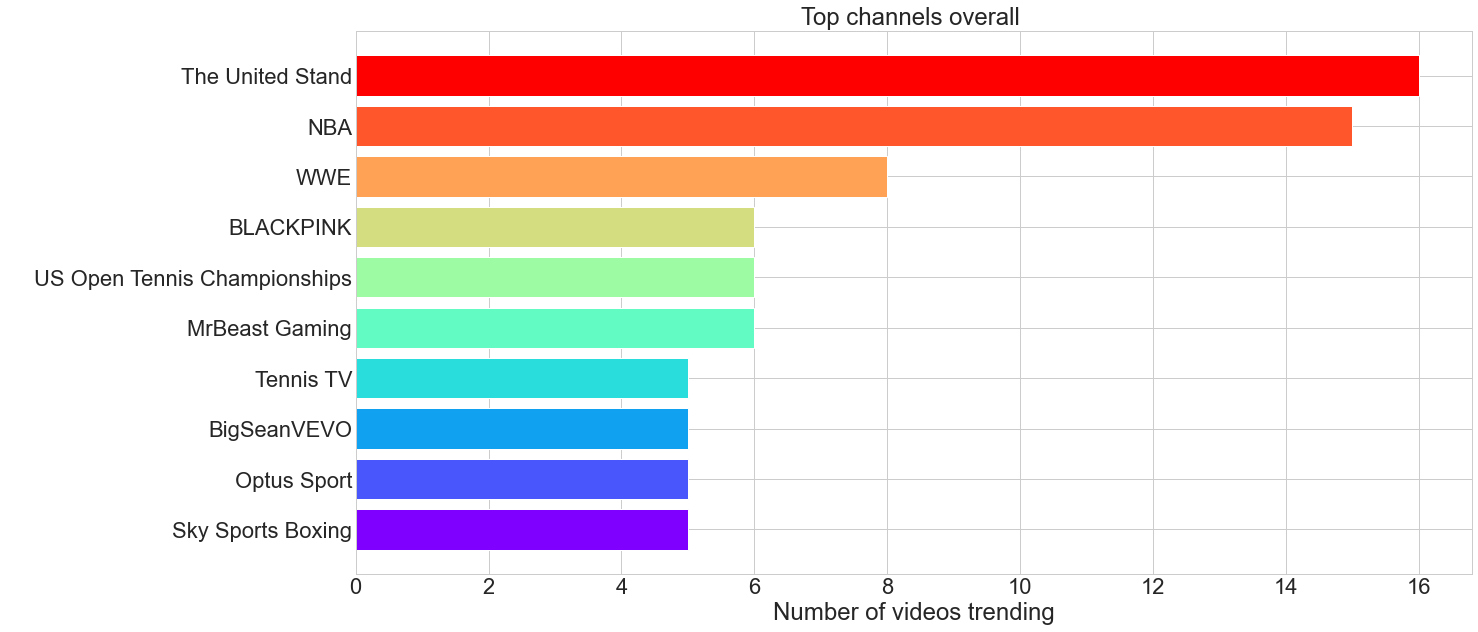

In [33]:
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top channels overall ')
plt.xlabel('Number of videos trending')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### The channel with the most trending videos "The United Stand"

The channel that has the most trending videos is 'The United Stand'. 

In [34]:
# Take a look at the titles and categories of videos by 'The United Stand'
english_vidsall[english_vidsall['channelTitle'].str.contains("The United Stand")][['title','view_count','categories']]

title  view_count  \
421   Harry Maguire Dropped? Sancho Transfer Forced!...    236173.0   
776   OFFICIAL! VAN DE BEEK Signs for Man Utd! Man U...    329849.0   
912   Sancho Transfer Panic! Badiashile Deal Off! Ma...    282603.0   
913            Sancho Transfer Update! Man Utd News Now    252004.0   
937   Solskjaer In Talks With Thiago! Sancho Deal Mo...    298000.5   
938   Solskjaer's 100 Million Transfer Race Begins! ...    259391.0   
1049  Thiago AND Upamecano AFTER Van De Beek Officia...    311281.0   
1051  Thiago Transfer Hope! Alexis Sanchez Slams Uni...    223500.5   
1094  United Back In for 75 Million Grealish! Man Ut...    157532.0   
1095  United Shock Transfer Statement! Messi Transfe...    227243.0   
1096  United Start Spending! Maguire & Messi Latest!...    350803.5   
1097  United Transfers Incoming! Stand By Harry Magu...    242678.0   
1098  Upamecano and Messi Transfer Blow! Man Utd Tra...    218339.0   
1103  Van De Beek Confirms United Switch! Man Utd Tr...    314042.5   
1104  Van De Beek Done SANCHO In Next! Man Utd Trans...    310090.0   
1105  Van De Beek Here We Go Fabrizio Romano! Man Ut...    413643.6   

         categories  
421   Entertainment  
776          Sports  
912          Sports  
913          Sports  
937          Sports  
938   Entertainment  
1049         Sports  
1051         Sports  
1094  Entertainment  
1095  Entertainment  
1096         Sports  
1097         Sports  
1098         Sports  
1103         Sports  
1104         Sports  
1105         Sports

### Plot 6 Views of trending videos

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


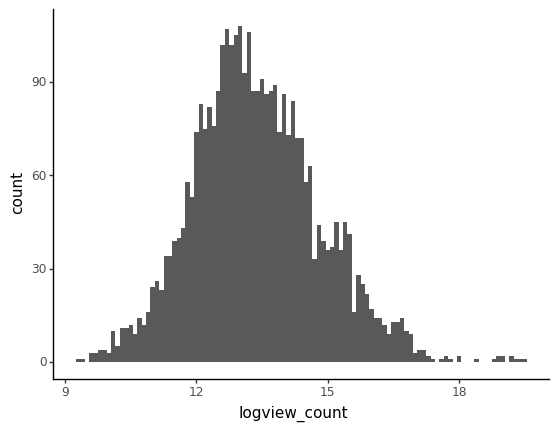

<ggplot: (7015632273)>

In [35]:
english_vids['logview_count'] = np.log(english_vids['view_count'])
(ggplot(english_vids, aes(x='logview_count')) 
 + geom_histogram(binwidth=0.1)
 + theme_classic()
)

### Video with the lowest views

In [36]:
mincount = min(english_vids['view_count'])
english_vids[(english_vids.view_count == mincount)]

title      channelTitle  \
3272    [Full Event] ONE Championship: A NEW BREED  ONE Championship   
3400  🔴 [Live in HD] ONE Championship: A NEW BREED  ONE Championship   

     categories  categoryId trending_date  \
3272     Sports          17      20.01.09   
3400     Sports          17      20.29.08   

                                                   tags           publishedAt  \
3272  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...  2020-08-28T15:13:21Z   
3400  Fights|ONE|ONEFC|ONE Championship|MMA|Mixed Ma...  2020-08-28T15:13:21Z   

      view_count  likes  dislikes  logdis  loglikes  total rating  logviews  \
3272         0.0    0.0       0.0    -inf      -inf           0.0      -inf   
3400         0.0    0.0       0.0    -inf      -inf           0.0      -inf   

      lograting  logview_count  
3272       -inf           -inf  
3400       -inf           -inf

Views as low as 11442 was on the trending page

In [37]:
# Calculated liked ratio
english_vids['likedratio'] = english_vids['likes']/(english_vids['likes']+english_vids['dislikes']+0.1)

In [172]:
# Videos from each day
df_0901 = english_vids[(english_vids.trending_date == '20.01.09')]
df_0902 = english_vids[(english_vids.trending_date == '20.02.09')]
df_0903 = english_vids[(english_vids.trending_date == '20.03.09')]
df_0904 = english_vids[(english_vids.trending_date == '20.04.09')]
df_0905 = english_vids[(english_vids.trending_date == '20.05.09')]
df_0906 = english_vids[(english_vids.trending_date == '20.06.09')]

In [39]:
# Videos from category "News & Politics"
df_n = english_vids[(english_vids.categories=='News & Politics')]
df_n.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 26th
df_n26 = df_n[(df_n.trending_date == '20.26.08')]
df_n26.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 27th
df_n27 = df_n[(df_n.trending_date == '20.27.08')]
df_n27.reset_index(drop=True, inplace=True)

In [40]:
# Videos from category "Entertainment"
df_e = english_vids[(english_vids.categories=='Entertainment')]
df_e.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 26th
df_e26 = df_e[(df_e.trending_date == '20.26.08')]
df_e26.reset_index(drop=True, inplace=True)
# Videos from category "News & Politics" from August 27th
df_e27 = df_e[(df_e.trending_date == '20.27.08')]
df_e27.reset_index(drop=True, inplace=True)

In [41]:
# Videos from category "Entertainment" from August 29th
df_e29 = df_e[(df_e.trending_date == '20.29.08')]
df_e29.reset_index(drop=True, inplace=True)

In [42]:
# Videos from category "News & Politics" from August 29th
df_n29 = df_n[(df_n.trending_date == '20.29.08')]
df_n29.reset_index(drop=True, inplace=True)

In [43]:
# Videos from category "Entertainment" from sep 01
df_e901 = df_e[(df_e.trending_date == '20.01.09')]
df_e901.reset_index(drop=True, inplace=True)

In [44]:
# Videos from category "Entertainment" from sep 02
df_e902 = df_e[(df_e.trending_date == '20.02.09')]
df_e902.reset_index(drop=True, inplace=True)

In [45]:
# Videos from category "Entertainment" from sep 03
df_e903 = df_e[(df_e.trending_date == '20.03.09')]
df_e903.reset_index(drop=True, inplace=True)

In [46]:
# Videos from category "Entertainment" from sep 04
df_e904 = df_e[(df_e.trending_date == '20.04.09')]
df_e904.reset_index(drop=True, inplace=True)

In [47]:
# Create a wordcloud

In [48]:
# Words NOT to include in wordcloud or the frequency plot 
# (add some to defult STOPWORDS list from wordcloud)
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('I')
stopwords.add('(day')
stopwords.add('|')
stopwords.add('new')
stopwords.add('none')
stopwords.add('[none]')
stopwords.add('-')
stopwords.add('news')
stopwords.add('&')

In [49]:
# Some videos tag the same words multiple times 
# And that may skew the wordcloud or the word frequency results.
# Here, the number of times each word is used in each cell is used in tags

# First, combine video duplicates (from 3 different days)

english_vidscombined = english_vids.groupby(['title','channelTitle','tags']).mean().reset_index()


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(english_vidscombined))
titles = english_vidscombined['tags'].str.lower()
for r in rows:
    str_incell = ''.join(titles[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])

In [50]:
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()

In [51]:
# Maximum number of times a word was tagged for the same video
maxcount = max(word_count_in_eachcell2['count'])
str(maxcount)

'29.0'

In [52]:
word_count_in_eachcell2[(word_count_in_eachcell2['count']==maxcount)]

words  row  count
7464  faze  509   29.0

The word 'faze' is tagged 29 times for a single video! This will definately skew the wordcloud result.

In [53]:
# Removing duplicates (same multiple tags for the same video) by just using the word list

# Shuffle order first
word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
# Then combine the words column as a string
str_a = ' '.join(word_count_in_eachcell3['words']) 

### Plot 7 Wordcloud for all videos for 08/26/2020, 08/27/2020, 08/29/2020, and 09/01/2020

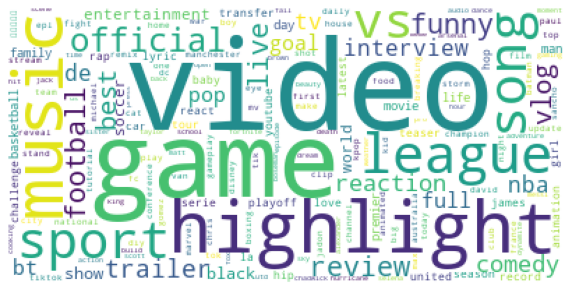

In [54]:
# Create wordcould with the words extracted
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(str_a)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
# Save as a different name to use later 
allwords = word_count_in_eachcell3

## News & Politics 

## "News & Politics" category  8/26/20

### Plot 8 Wordcloud for "News & Politics" category on 8/26/20

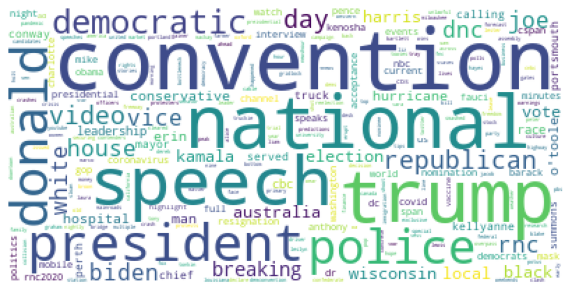

In [56]:
# Remove duplicate tags for same videos

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of news and politics dataframe for the 26th
rows = range(0, len(df_n26))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_n26['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_n26['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 9 Popular words used as titles and tags in the  "News & Politics" category on 8/26/20 was related to the Republican National Convention

<BarContainer object of 10 artists>

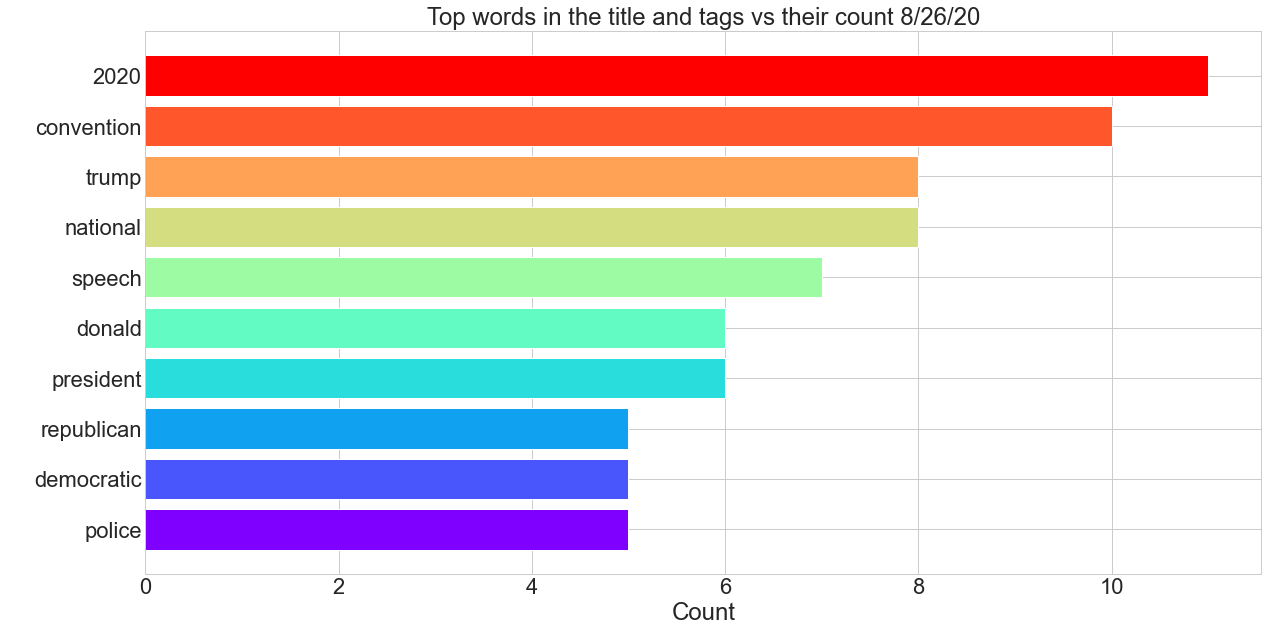

In [57]:
# Take a look at which words were popular in tags in video titles on the 26th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 8/26/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [58]:


kw_list = ['Republican National Convention','Democratic National Convention']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-31',geo='US',gprop='')
convention = pytrends.interest_over_time()
convention2 = convention
convention2 = convention2.reset_index()
convention2.columns = ['day','Republican National Convention','Democratic National Convention','ispartial']
convention2 = pd.melt(convention2, id_vars = ['day'], value_vars = ['Republican National Convention','Democratic National Convention'])
convention2.columns = ['day','term','count']

### Plot 10 Google interest over time for "Republican National Convention" and "Democratic National Convention"

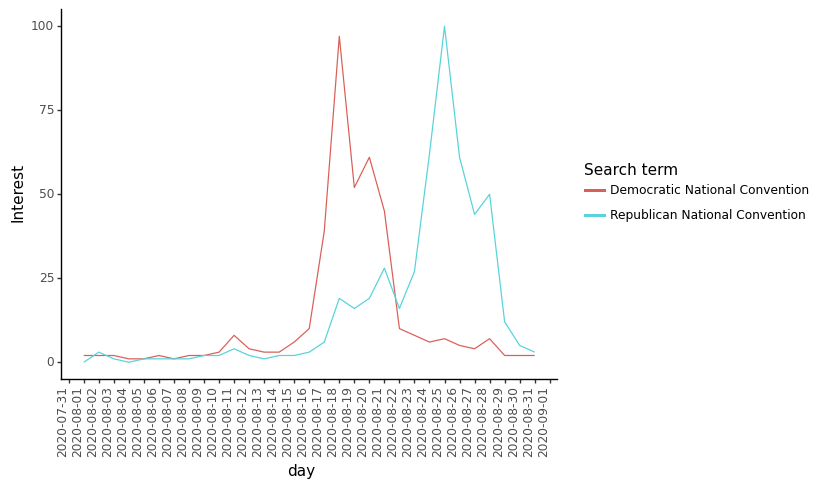

<ggplot: (7016262137)>

In [59]:
(ggplot(convention2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest') 
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')

)

Democratic national convention was held 8/17-8/20. Republican national convention was held 8/24-8/27.

### Videos trending on 8/26/20 with tags related to political party conventions

In [60]:
republican_title = df_n26[df_n26['title'].str.contains("republican", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
republican_tags = df_n26[df_n26['tags'].str.contains("republican", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
convention_title = df_n26[df_n26['title'].str.contains("convention", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
convention_tags = df_n26[df_n26['tags'].str.contains("convention", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
RNC_title = df_n26[df_n26['title'].str.contains("RNC", case=False)][['title','channelTitle','tags','publishedAt','view_count']]
RNC_tags = df_n26[df_n26['tags'].str.contains("RNC", case=False)][['title','channelTitle','tags','publishedAt','view_count']]

republican = republican_title.append(republican_tags)
republican = republican.append(convention_title)
republican = republican.append(convention_tags)
republican = republican.append(RNC_title)
republican = republican.append(RNC_tags)

republican = republican.groupby(['title','channelTitle','tags','publishedAt']).mean()
republican = republican.sort_values(by = 'view_count',ascending=False)
republican.reset_index()

title  channelTitle  \
0  Watch Barack Obama’s Full Speech At The 2020 D...      NBC News   
1  Trump speaks at RNC after securing 2020 GOP no...      Fox News   
2  WATCH: Kamala Harris’ full speech at the 2020 ...  PBS NewsHour   
3             Republican National Convention (Day 2)        C-SPAN   
4             Republican National Convention (Day 1)        C-SPAN   
5  Joe Biden speech at the Democratic Convention ...     Joe Biden   

                                                tags           publishedAt  \
0  Desk Video|News|Politics|Decision 2020|2020 Co...  2020-08-20T03:31:29Z   
1  Fox News Channel|Fox News|News|FNC|breaking ne...  2020-08-24T17:49:46Z   
2  dnc|democratic national convention|joe biden|v...  2020-08-20T03:41:13Z   
3  C-SPAN|CSPAN|2020|RNC|RNC2020|Charlotte|Washin...  2020-08-26T03:19:21Z   
4  C-SPAN|CSPAN|2020|RNC|RNC2020|Charlotte|Washin...  2020-08-25T03:07:30Z   
5  joe biden|biden|joe biden ad|biden ad|joe bide...  2020-08-21T04:00:56Z   

   view_count  
0   3230539.0  
1   1252393.0  
2    913674.0  
3    905838.0  
4    886515.0  
5    458618.0

Republican national convention trending real time, democratic national convention trending a week after.

### Videos trending on 8/26/20 with tags or titles with 'police'

In [61]:
police_title = df_n26[df_n26['title'].str.contains("police", case=False)][['title','channelTitle','tags','view_count']]
police_tags = df_n26[df_n26['tags'].str.contains("police", case=False)][['title','channelTitle','tags','view_count']]


police = police_title.append(police_tags)
police = police.append(police_title)


police = police.groupby(['title','channelTitle']).mean()
police = police.sort_values(by = 'view_count',ascending=False)
police.reset_index()

title      channelTitle  \
0  29-year-old Black man in Wisconsin hospital af...  CBS This Morning   
1  Protests erupt after police shoot a Black man ...   CNBC Television   
2  Portsmouth Vice Mayor served summons after cal...        WAVY TV 10   
3  Portsmouth's vice mayor served summons after c...        WAVY TV 10   

   view_count  
0   1769771.0  
1    410044.0  
2    181940.0  
3     87156.0

### Plot 11 Number of likes for videos trending in the "News & Politics" category on 8/26/20 

<BarContainer object of 16 artists>

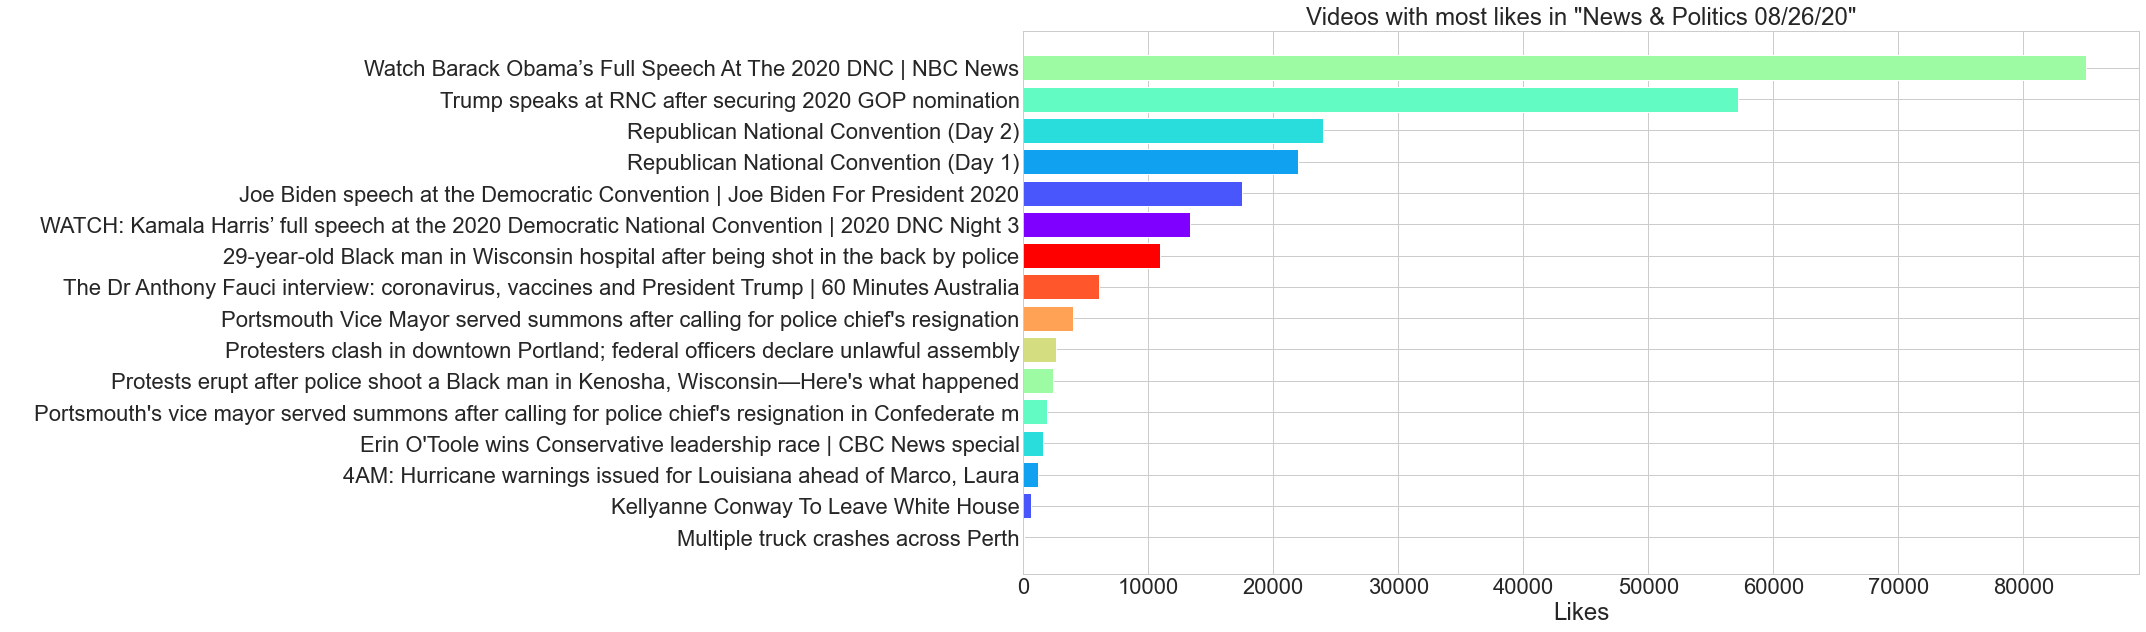

In [62]:
# take a look at which videos were rated highly

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Videos with most likes in "News & Politics 08/26/20"')
plt.xlabel('Likes')
plt.ylabel(' ')
df_n26 = df_n26.sort_values(by=['likes'],ascending=True)
df_n26.reset_index(drop=True, inplace=True)
plt.barh(df_n26['title'], df_n26['likes'], color=colors)




The most liked video was Barack Obama’s Full Speech.

### Plot 12 Number of views for videos trending in the "News & Politics" category on 8/26/20 

<BarContainer object of 16 artists>

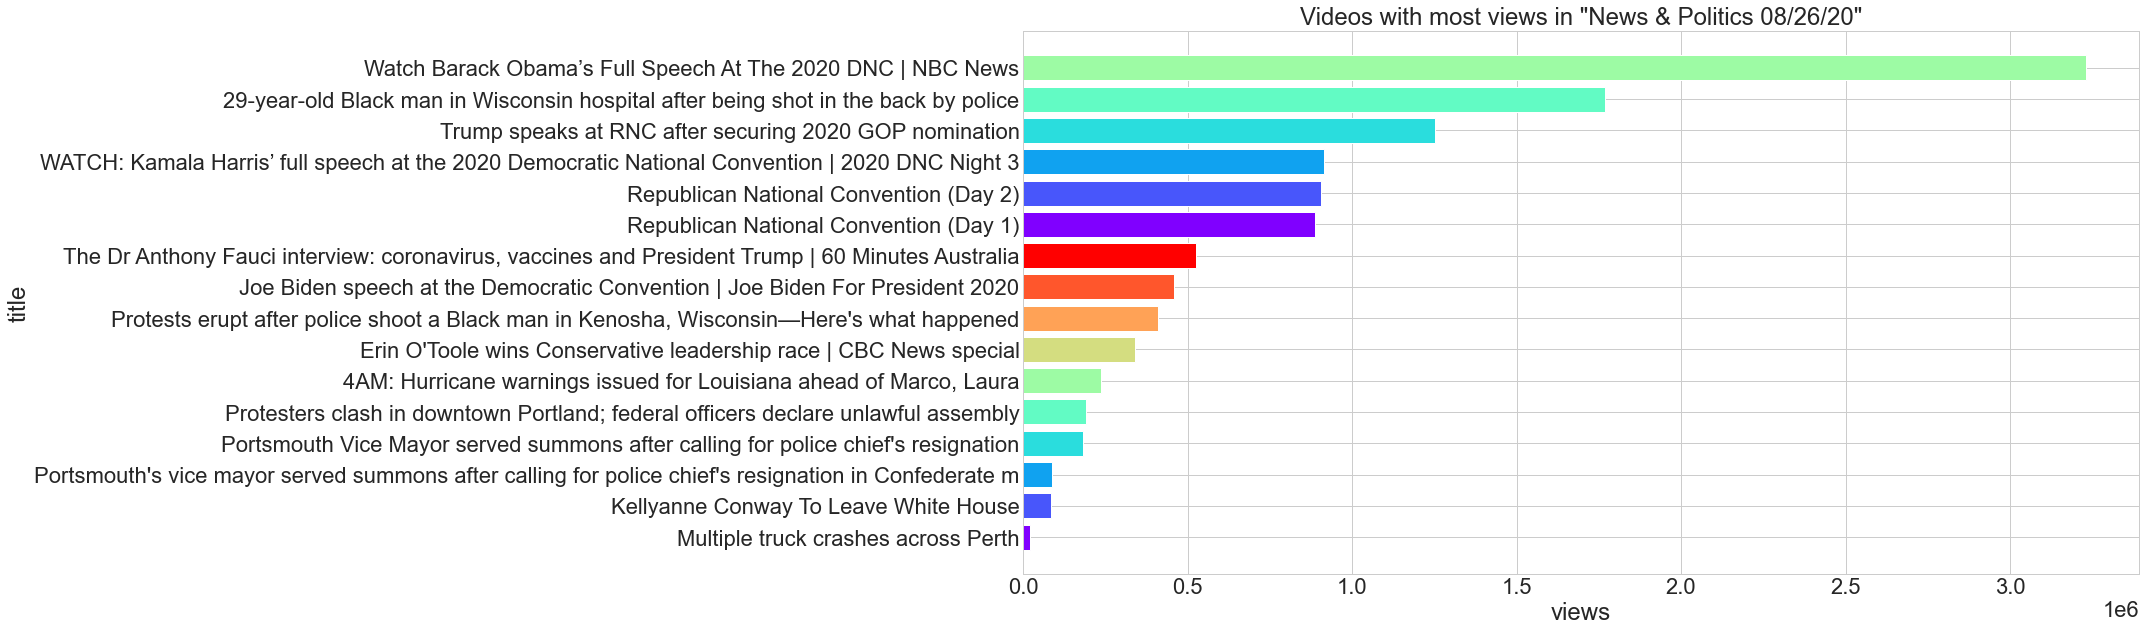

In [63]:
# take a look at which videos were viewed the most
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Videos with most views in "News & Politics 08/26/20"')
plt.xlabel('views')
plt.ylabel('title')
df_n26 = df_n26.sort_values(by=['view_count'],ascending=True)
df_n26.reset_index(drop=True, inplace=True)
plt.barh(df_n26['title'], df_n26['view_count'], color=colors)





The most viewed video was Barack Obama’s Full Speech.

## "News & Politics" category  8/27/20

### Plot 13 Wordcloud for "News & Politics" category on 8/27/20

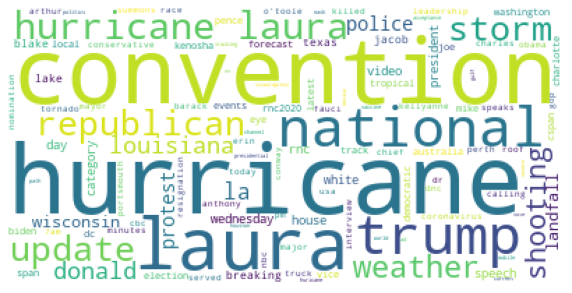

In [64]:
# Remove duplicate tags for same videos

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of news and politics dataframe for the 27th
rows = range(0, len(df_n27))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_n27['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_n27['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 14 Popular words for "News & Politics" category on 8/27/20 was related to Hurricane Laura

<BarContainer object of 20 artists>

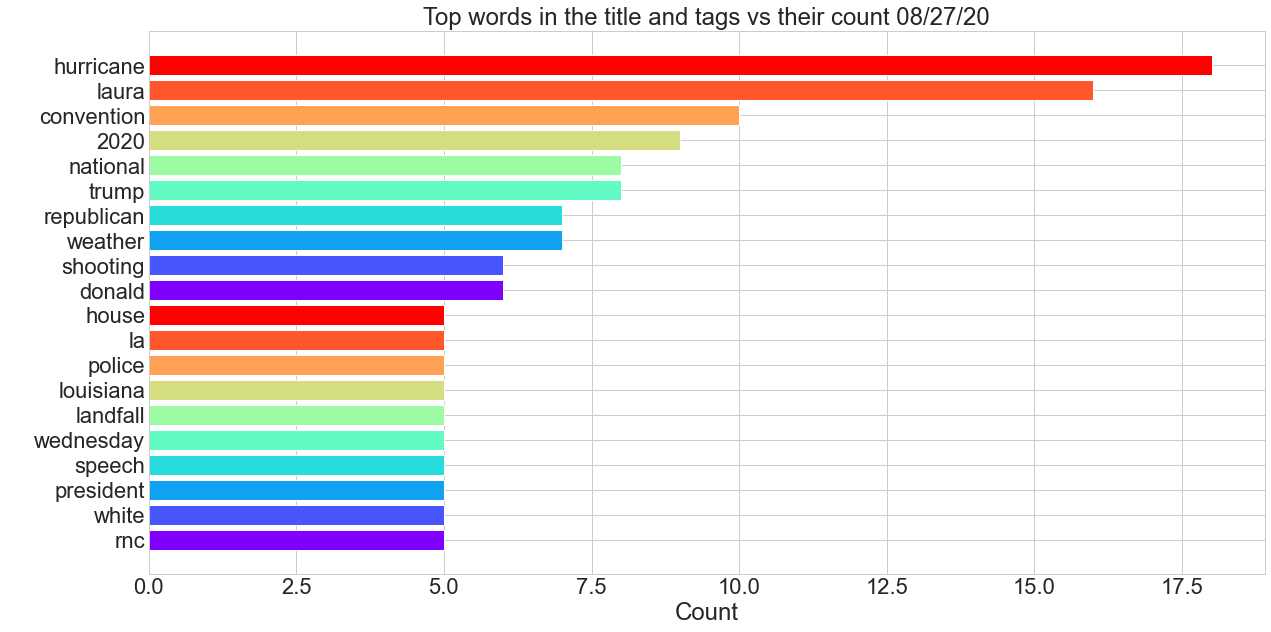

In [65]:
# Take a look at which words were popular in tags in video titles on the 27th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/27/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

In [66]:
import pandas as pd 
from pytrends.request import TrendReq
import datetime as dt

kw_list = ['Hurricane Laura','Jacob Blake']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-18 2020-08-31',geo='US',gprop='')
hurricaneblake = pytrends.interest_over_time()
hurricaneblake2 = hurricaneblake
hurricaneblake2 = hurricaneblake2.reset_index()
hurricaneblake2.columns = ['day','Hurricane Laura','Jacob Blake','ispartial']
hurricaneblake2 = pd.melt(hurricaneblake2, id_vars = ['day'], value_vars = ['Hurricane Laura','Jacob Blake'])
hurricaneblake2.columns = ['day','term','count']

### Plot 15 Google interest over time for "Hurricane Laura" and "Jacob Blake"

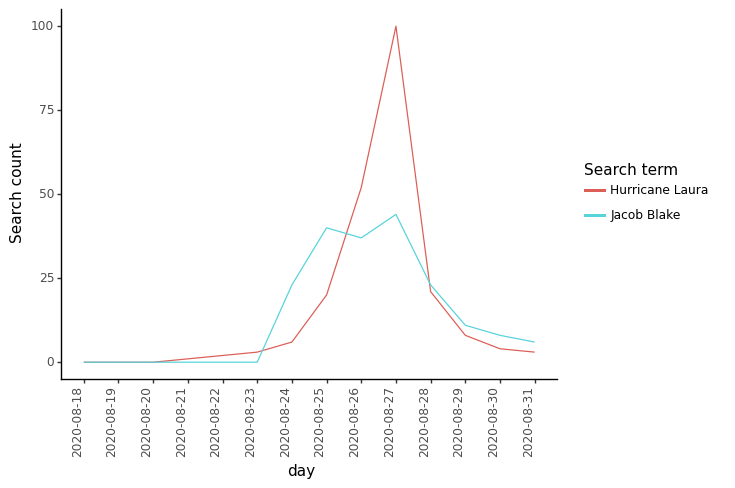

<ggplot: (7016307921)>

In [67]:
(ggplot(hurricaneblake2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Search count')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

### Trending videos on 8/27/20 with "hurricane laura" in their title or tags.

In [68]:
hurricane_title = df_n27[df_n27['title'].str.contains("hurricane", case=False)][['title','channelTitle','publishedAt','view_count']]
hurricane_tags = df_n27[df_n27['tags'].str.contains("hurricane", case=False)][['title','channelTitle','publishedAt','view_count']]
laura_title = df_n27[df_n27['title'].str.contains("laura", case=False)][['title','channelTitle','publishedAt','view_count']]
laura_tags = df_n27[df_n27['tags'].str.contains("laura", case=False)][['title','channelTitle','publishedAt','view_count']]

hurricane = hurricane_title.append(hurricane_tags)
hurricane = hurricane.append(laura_title)
hurricane = hurricane.append(laura_tags)


hurricane = hurricane.groupby(['title','channelTitle','publishedAt']).mean()
hurricane = hurricane.sort_values(by = 'view_count',ascending=False)
hurricane.reset_index()

title  \
0  Wednesday 4 pm update: Monstrous Hurricane Lau...   
1  Hurricane Laura makes landfall in Cameron, Lou...   
2  4AM: Hurricane warnings issued for Louisiana a...   
3  Hurricane Laura Eyewall Slams Carlyss, LA - 8/...   
4      08-27-2020 Lake Charles, LA - Hurricane Laura   
5     Hurricane Laura sends hotel roof pieces flying   
6  Wednesday 7am update: Major Hurricane Laura he...   
7  Hurricane Laura, Lake Arthur, LA Tornado Warne...   
8  Hurricane Laura latest updates as it nears lan...   

                           channelTitle           publishedAt  view_count  
0                                 WWLTV  2020-08-26T21:17:32Z    277015.0  
1                         ABC13 Houston  2020-08-27T06:42:26Z    239318.0  
2                                 WWLTV  2020-08-23T10:29:31Z    238787.0  
3                     StormChasingVideo  2020-08-27T09:11:27Z    202528.0  
4                     Live Storms Media  2020-08-27T06:48:36Z    201837.0  
5                         ABC13 Houston  2020-08-27T09:23:43Z    181287.0  
6                                 WWLTV  2020-08-26T12:30:41Z    177105.0  
7                     StormChasingVideo  2020-08-26T19:25:23Z    150065.0  
8  KENS 5: Your San Antonio News Source  2020-08-26T22:31:33Z    125680.0

### Trending videos on 8/27/20 with " Jacob Blake " in their title or tags.

In [69]:
jacob_title = df_n27[df_n27['title'].str.contains("jacob", case=False)][['title','channelTitle','publishedAt','view_count']]
jacob_tags = df_n27[df_n27['tags'].str.contains("jacob", case=False)][['title','channelTitle','publishedAt','view_count']]
blake_title = df_n27[df_n27['title'].str.contains("blake", case=False)][['title','channelTitle','publishedAt','view_count']]
blake_tags = df_n27[df_n27['tags'].str.contains("blake", case=False)][['title','channelTitle','publishedAt','view_count']]

jacob = jacob_title.append(jacob_tags)
jacob = jacob.append(blake_title)
jacob = jacob.append(blake_tags)


jacob = jacob.groupby(['title','channelTitle','publishedAt']).mean()
jacob = jacob.sort_values(by = 'view_count',ascending=False)
jacob.reset_index()

title channelTitle  \
0  2 killed, 1 wounded at protests in Wisconsin o...     WGN News   
1  Jacob Blake shooting timeline: What events led...    USA TODAY   

            publishedAt  view_count  
0  2020-08-26T11:32:01Z    939633.0  
1  2020-08-26T22:24:40Z    569237.0

Jacob Blake was shot on 8/23. Protests happened the next day. 2 people killed at protests on 8/25. These videos are trending real time.

### Plot 16 Views for "News & Politics" category on 8/27/20

<BarContainer object of 26 artists>

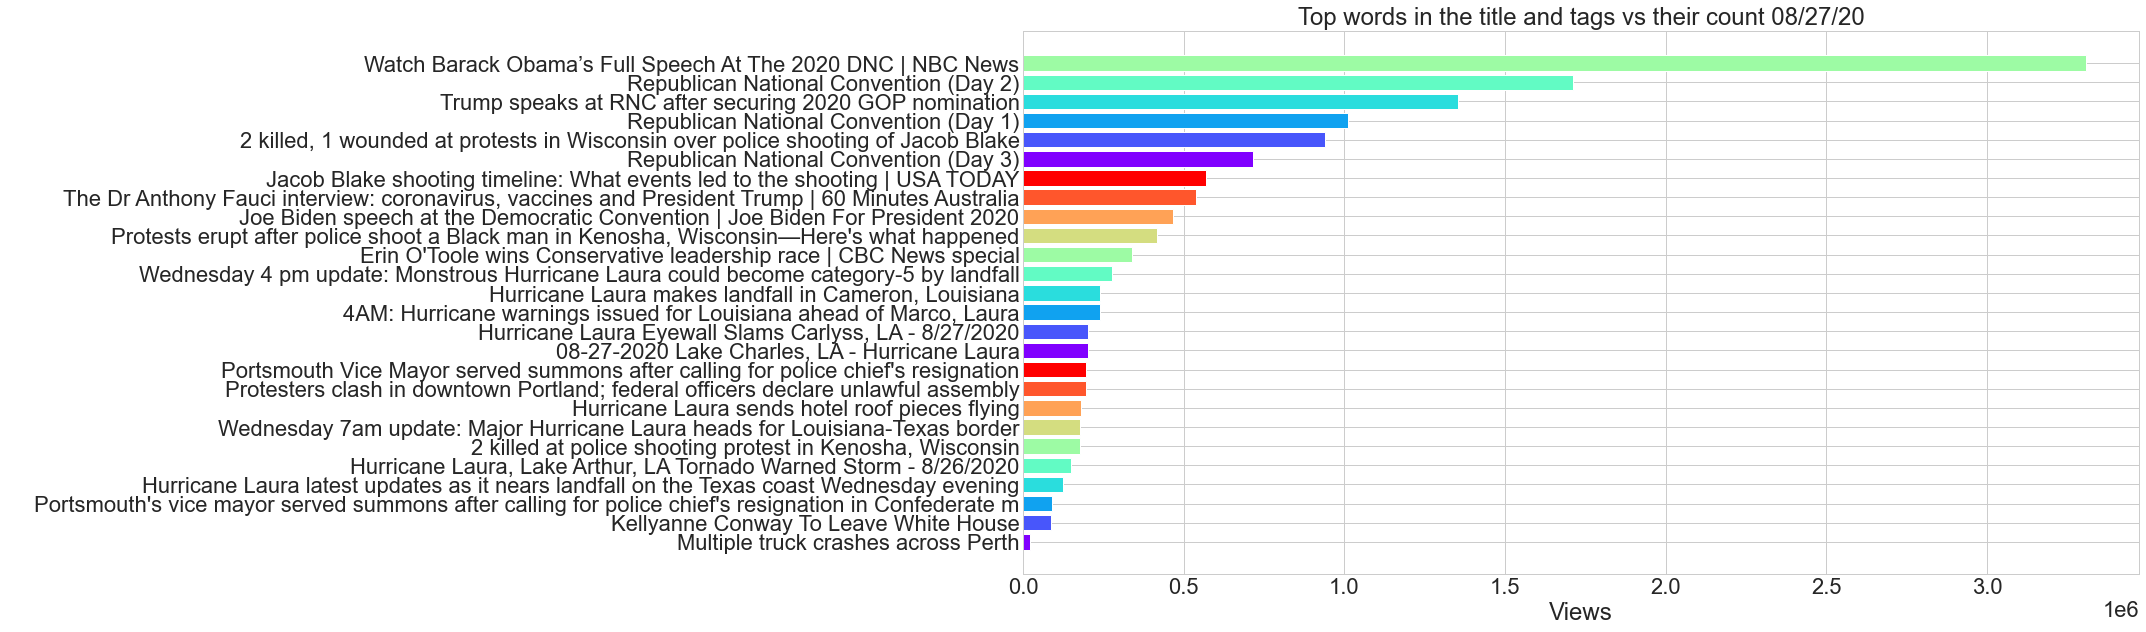

In [70]:
# take a look at which videos were viewed the most
plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/27/20')
plt.xlabel('Views')
plt.ylabel(' ')


df_n27 = df_n27.sort_values(by=['view_count'],ascending=True)
df_n27.reset_index(drop=True, inplace=True)
plt.barh(df_n27['title'], df_n27['view_count'], color=colors)



### Plot 17 Channels with multiple trending videos across days in the "News & Politics" category

<BarContainer object of 10 artists>

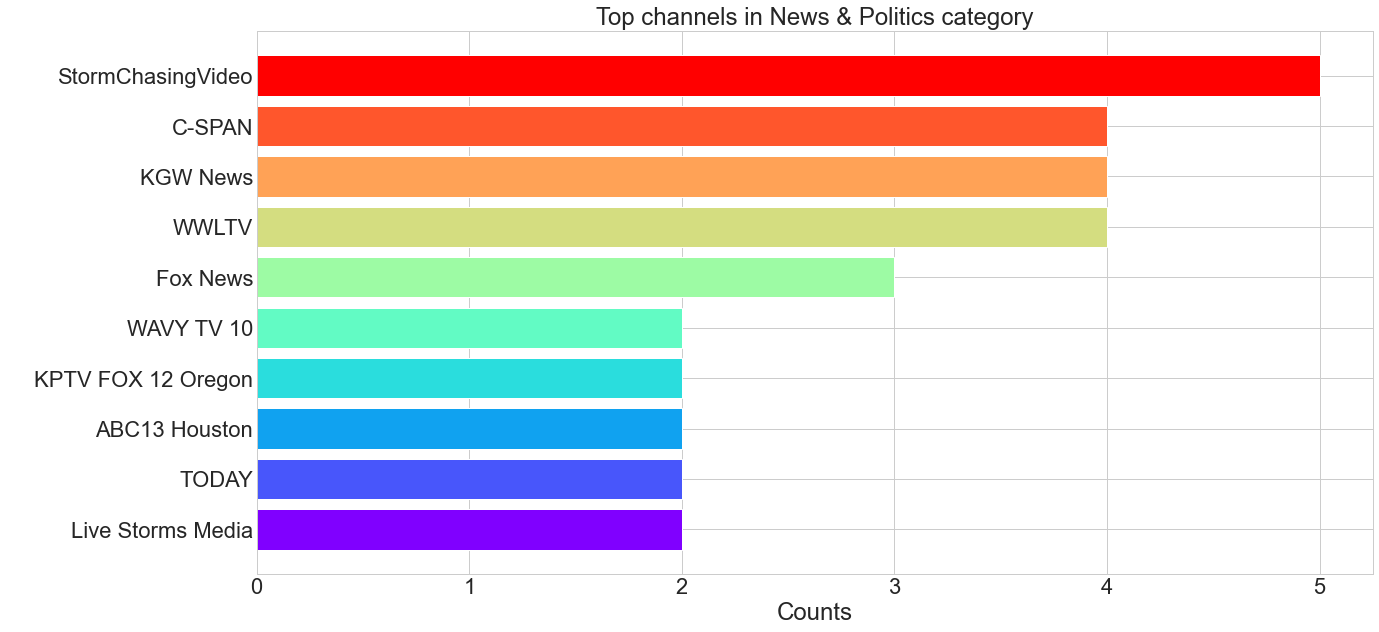

In [71]:
# Combine same videos (two videos are in the df twice for 26th and 27th)
group = df_n.groupby(['title','channelTitle','categories','categoryId','tags']).mean()
df_nall = group.reset_index()

all_channels = df_nall['channelTitle']

counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
    
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top channels in News & Politics category')
plt.xlabel('Counts')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

## Entertainment 

## "Entertainment" category 8/26/20

### Plot 18 Wordcloud for "Entertainment" category on 8/26/20

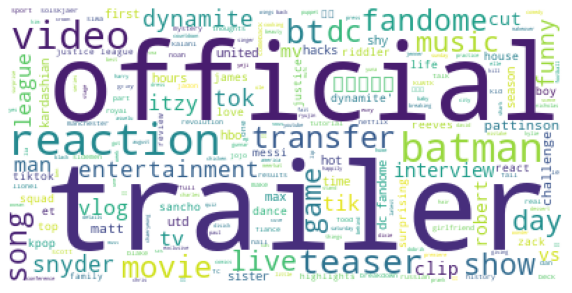

In [72]:
# Create a word cloud for "Entertainment" category from August 26th

# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of entertainment dataframe for the 26th
rows = range(0, len(df_e26))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_e26['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_e26['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Plot 19 The popular words used in titles and tags for "Entertainment" category on 8/26/20 was "trailer"

<BarContainer object of 10 artists>

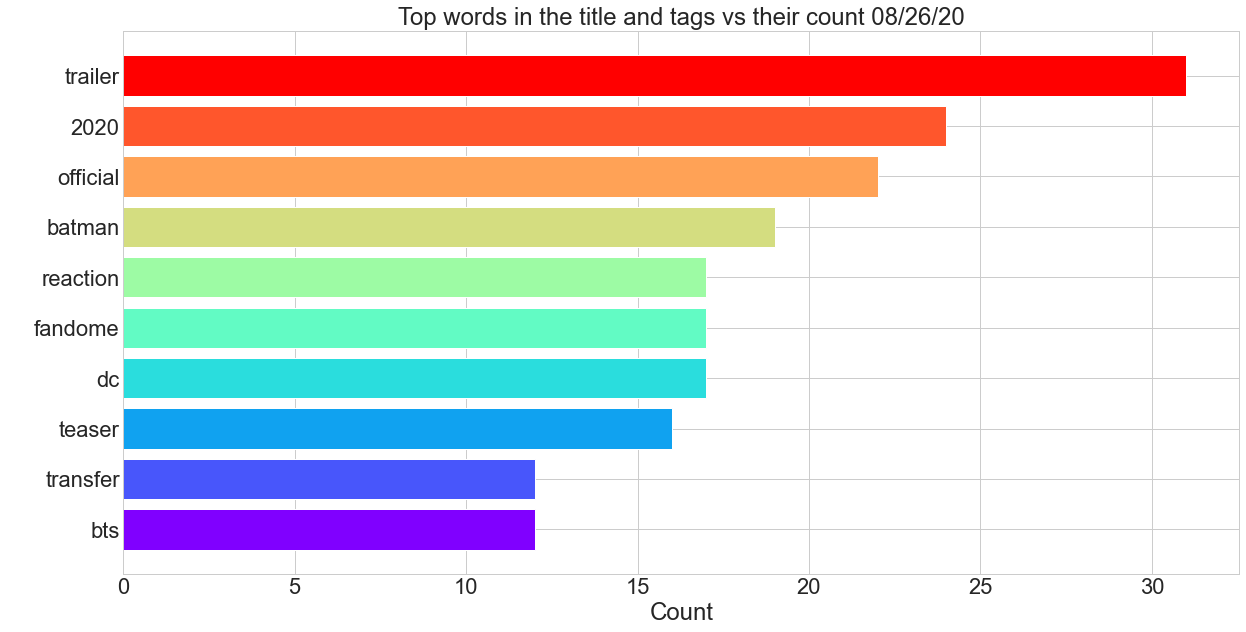

In [73]:
# Take a look at which words were popular in tags in video titles on the 26th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count 08/26/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### Videos trending on 8/26/20 with tags or title "trailer"

In [74]:
trailer_title = df_e26[df_e26['title'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]
trailer_tags = df_e26[df_e26['tags'].str.contains("trailer", case=False)][['title','channelTitle','publishedAt','view_count']]

trailer = trailer_title.append(trailer_tags)
trailer = trailer.append(trailer_title)
trailer = trailer.append(trailer_tags)


trailer = trailer.groupby(['title','channelTitle','publishedAt']).mean()
trailer = trailer.sort_values(by = 'view_count',ascending=False)
trailer26 = trailer.reset_index()
trailer26

title        channelTitle  \
0                         ITZY Not Shy Stage Practice                ITZY   
1   Suicide Squad: Kill the Justice League Officia...                  DC   
2           Enola Holmes | Official Trailer | Netflix             Netflix   
3             Gotham Knights - World Premiere Trailer                  DC   
4   The Comey Rule (2020) Official Trailer | SHOWT...            SHOWTIME   
5   The Batman Trailer 2021 Breakdown and Easter E...   Emergency Awesome   
6         The Batman - Official Trailer (My Thoughts)        Jeremy Jahns   
7            Raised by Wolves | New Trailer | HBO Max             HBO Max   
8   THE BATMAN Trailer Breakdown! Riddler Clue SOL...       New Rockstars   
9   Justice League: The Snyder Cut - Official Trai...        Jeremy Jahns   
10  THE BATMAN TRAILER REACTION! Robert Pattinson ...       New Rockstars   
11                        The Batman Trailer REACTION  Beyond The Trailer   
12            The Batman | DC Fandome Teaser Reaction           Hyper RPG   
13    Sneaky Details You Missed In The Batman Trailer              Looper   
14      Zack Snyder's Justice League Trailer REACTION  Beyond The Trailer   
15       Official Trailer | Doctor Who: Time Fracture          Doctor Who   
16  THE BATMAN Teaser Trailer Reaction & Thoughts ...   Black Nerd Comedy   
17  Zack Snyder’s Justice League | Official Teaser...          Blind Wave   

             publishedAt  view_count  
0   2020-08-19T09:00:00Z   7155425.0  
1   2020-08-23T00:19:51Z   4481604.0  
2   2020-08-25T12:30:00Z   3267148.0  
3   2020-08-22T17:34:48Z   2222329.0  
4   2020-08-24T13:00:04Z   1558989.0  
5   2020-08-23T02:25:51Z   1220683.0  
6   2020-08-23T06:20:53Z    911846.0  
7   2020-08-24T15:30:47Z    792296.0  
8   2020-08-24T20:47:15Z    624044.0  
9   2020-08-23T02:54:52Z    585168.0  
10  2020-08-23T03:35:14Z    547273.0  
11  2020-08-23T01:39:43Z    470616.5  
12  2020-08-23T08:27:42Z    341624.5  
13  2020-08-23T20:00:06Z    293788.0  
14  2020-08-22T22:37:44Z    238880.0  
15  2020-08-21T08:59:54Z    233353.0  
16  2020-08-23T04:55:03Z    206859.0  
17  2020-08-23T19:30:01Z    178592.0

In [75]:
kw_list = ['trailer','Batman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
batmanvstrailer = pytrends.interest_over_time()
batmanvstrailer2 = batmanvstrailer
batmanvstrailer2 = batmanvstrailer2.reset_index()
batmanvstrailer2.columns = ['day','trailer','Batman','ispartial']
batmanvstrailer2 = pd.melt(batmanvstrailer2, id_vars = ['day'], value_vars = ['trailer','Batman'])
batmanvstrailer2.columns = ['day','term','count']

### Plot 20 Google interest over time for "Batman" and "trailer"

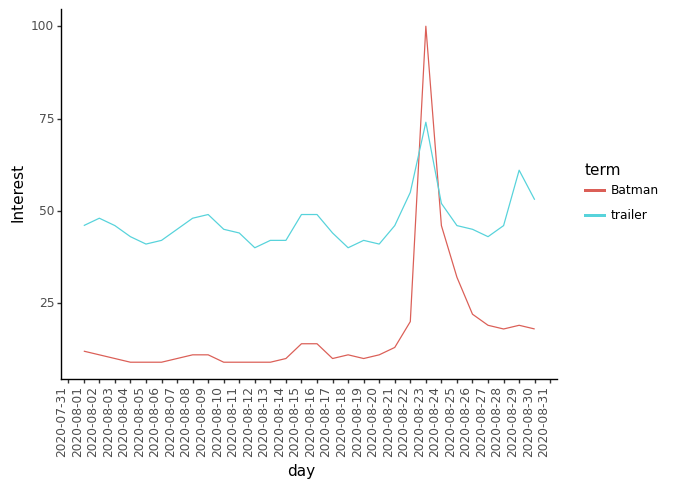

<ggplot: (7014889961)>

In [76]:
(ggplot(batmanvstrailer2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

Most of the trending movie trailers were published 8/22-23, and the reaction videos were pulished 1-2 days after.

### Plot 21 Top liked videos in the  "Entertainment" category on 8/26/20

<BarContainer object of 19 artists>

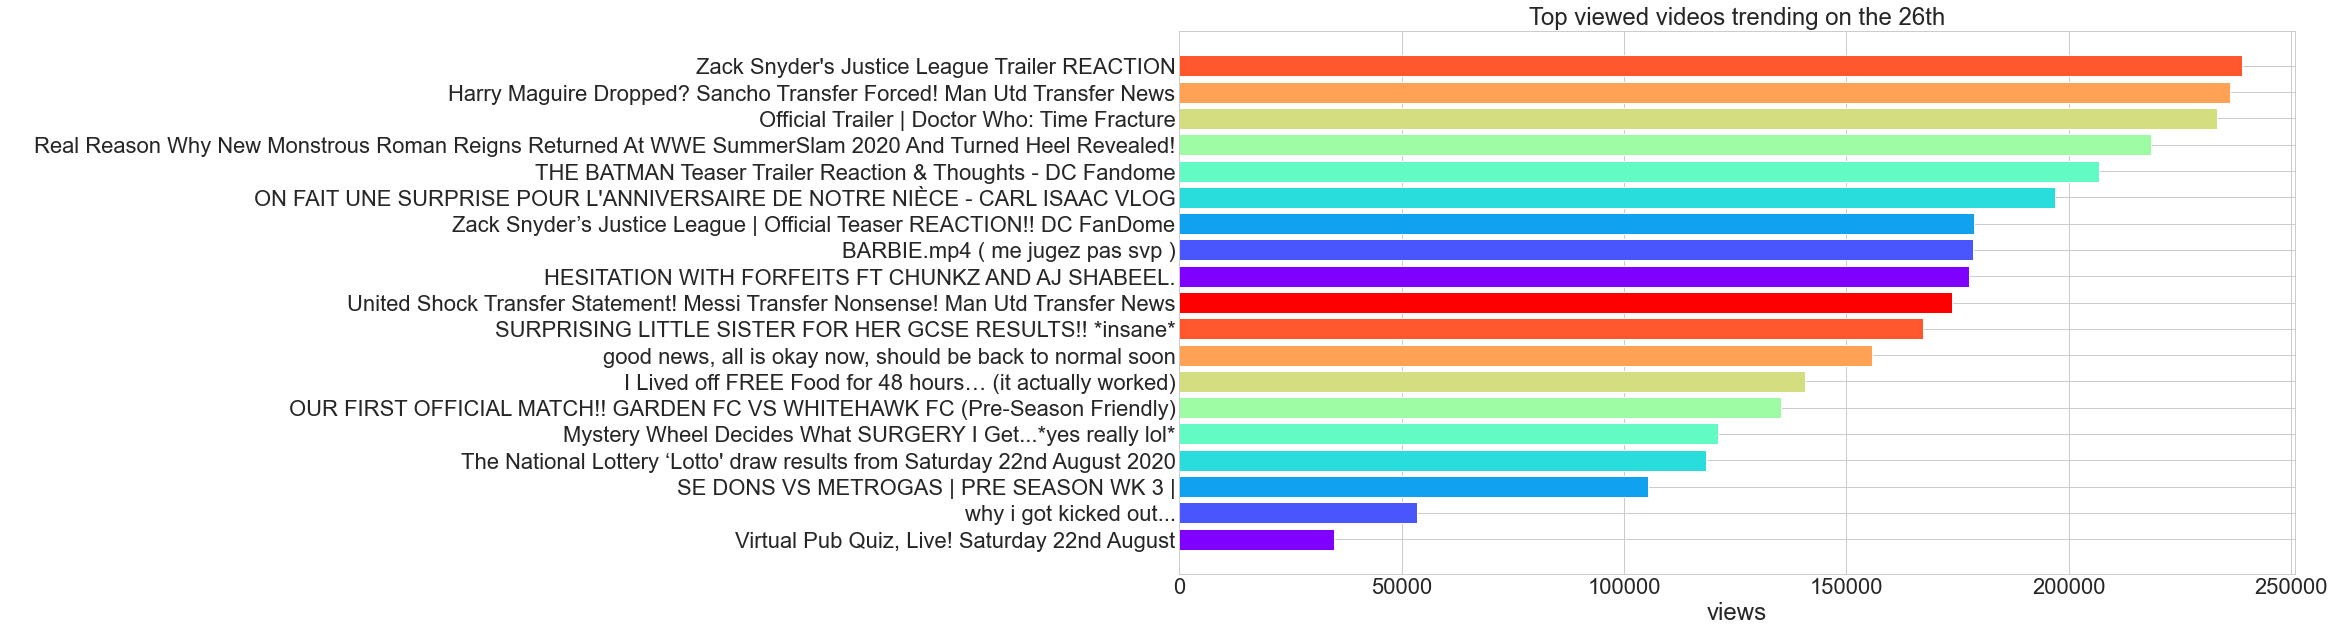

In [77]:
# take a look at which videos were viewed the most
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

plt.title('Top viewed videos trending on the 26th')
plt.xlabel('views')
plt.ylabel(' ')

df_e26 = df_e26.sort_values(by=['view_count'],ascending=True)
df_e26.reset_index(drop=True, inplace=True)
df_e26_top = df_e26[1:20]
plt.barh(df_e26_top['title'], df_e26_top['view_count'], color=colors)

### Plot 22 Wordcloud for "Entertainment" category on 8/27/20

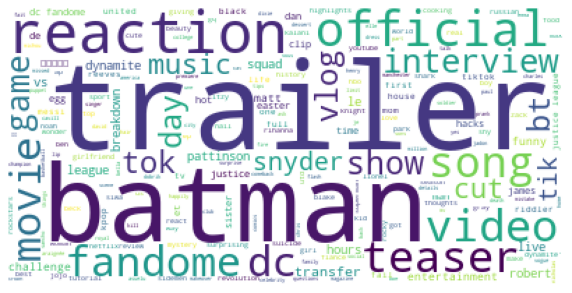

In [78]:
# Create wordcloud for Entertainment on the 27th
# Create empty dataframe
word_in_eachcell = pd.DataFrame(columns=['words','count','row'])
# Find the length of entertainment dataframe for the 26th
rows = range(0, len(df_e27))
# Change every word in the tags column to lowercase and save it as 'tags'
tags = df_e27['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# create one string with all words in the cell. had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ') # replace | with space

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    # Split words using spaces and remove words in stopwords
    counted_words = collections.Counter(filtered_words)
    # Count the number of times used
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_in_eachcell = pd.concat([word_in_eachcell,counted_words])
    
word_in_eachcell2=word_in_eachcell.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_in_eachcell2['words']) 
all_titles = ' '.join(df_e27['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot 23 Popular word used in titles and tags for "Entertainment" category on 8/27/20 was “trailer” and "Batman"

<BarContainer object of 10 artists>

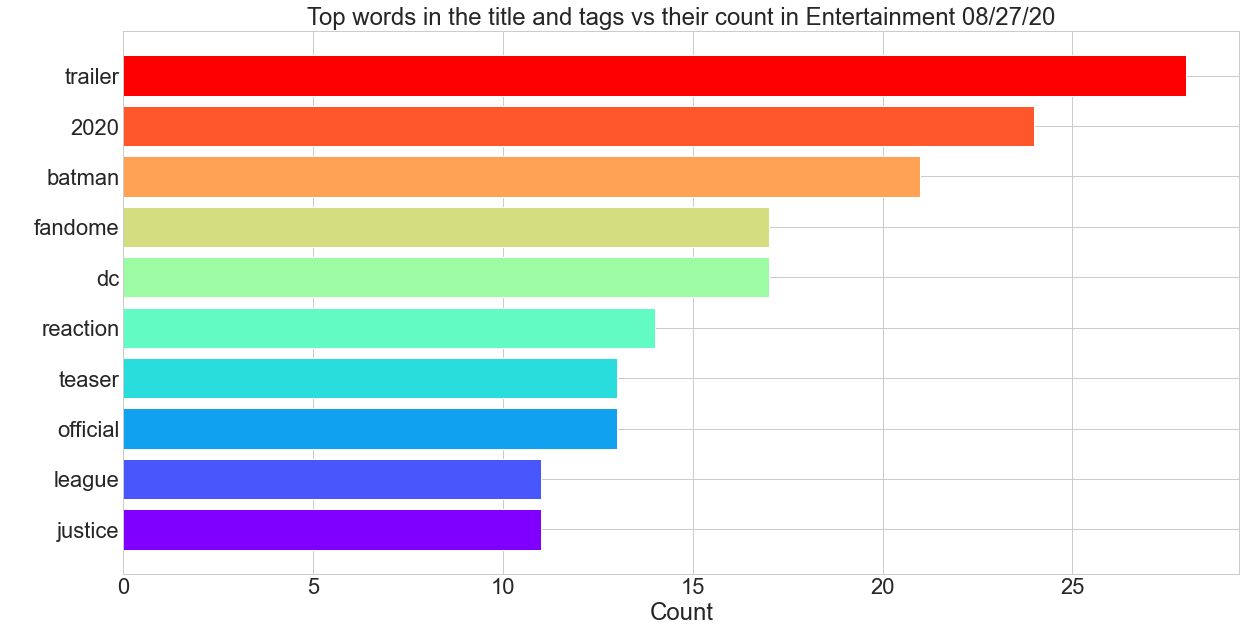

In [79]:
# Take a look at which words were popular in tags in video titles on the 27th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/27/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

### All videos with word "trailer" in title or tags trending on 26 or 27th

In [80]:
trailer_title = df_e27[df_e27['title'].str.contains("trailer", case=False)][['title','channelTitle','view_count']]
trailer_tags = df_e27[df_e27['tags'].str.contains("trailer", case=False)][['title','channelTitle','view_count']]

trailer = trailer_title.append(trailer_tags)
trailer = trailer.append(trailer_title)
trailer = trailer.append(trailer_tags)


trailer = trailer.groupby(['title','channelTitle']).mean()
trailer = trailer.sort_values(by = 'view_count',ascending=False)
trailer27 = trailer.reset_index()

df = pd.merge(trailer26,trailer27, on='title',how='outer', indicator=True)
df = df[['title','channelTitle_x','channelTitle_y','_merge']]

df = df.replace(regex=['right_only'],value='only 27th')
df = df.replace(regex=['left_only'],value='only 26th')
df.columns = ['title','channelTitle_x','channelTitle_y','trending date']
df

title      channelTitle_x  \
0                         ITZY Not Shy Stage Practice                ITZY   
1   Suicide Squad: Kill the Justice League Officia...                  DC   
2           Enola Holmes | Official Trailer | Netflix             Netflix   
3             Gotham Knights - World Premiere Trailer                  DC   
4   The Comey Rule (2020) Official Trailer | SHOWT...            SHOWTIME   
5   The Batman Trailer 2021 Breakdown and Easter E...   Emergency Awesome   
6         The Batman - Official Trailer (My Thoughts)        Jeremy Jahns   
7            Raised by Wolves | New Trailer | HBO Max             HBO Max   
8   THE BATMAN Trailer Breakdown! Riddler Clue SOL...       New Rockstars   
9   Justice League: The Snyder Cut - Official Trai...        Jeremy Jahns   
10  THE BATMAN TRAILER REACTION! Robert Pattinson ...       New Rockstars   
11                        The Batman Trailer REACTION  Beyond The Trailer   
12            The Batman | DC Fandome Teaser Reaction           Hyper RPG   
13    Sneaky Details You Missed In The Batman Trailer              Looper   
14      Zack Snyder's Justice League Trailer REACTION  Beyond The Trailer   
15       Official Trailer | Doctor Who: Time Fracture          Doctor Who   
16  THE BATMAN Teaser Trailer Reaction & Thoughts ...   Black Nerd Comedy   
17  Zack Snyder’s Justice League | Official Teaser...          Blind Wave   
18  Justice League Snyder Cut Trailer Breakdown! E...                 NaN   
19  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...                 NaN   

        channelTitle_y trending date  
0                  NaN     only 26th  
1                   DC          both  
2              Netflix          both  
3                   DC          both  
4             SHOWTIME          both  
5    Emergency Awesome          both  
6         Jeremy Jahns          both  
7                  NaN     only 26th  
8        New Rockstars          both  
9         Jeremy Jahns          both  
10       New Rockstars          both  
11  Beyond The Trailer          both  
12           Hyper RPG          both  
13              Looper          both  
14                 NaN     only 26th  
15                 NaN     only 26th  
16   Black Nerd Comedy          both  
17          Blind Wave          both  
18       New Rockstars     only 27th  
19       New Rockstars     only 27th

The word 'trailer' was used in title and tags the most also on the 27 the but some videos trending on the 26th was replaced by other videos.

### All videos with word "interview" in title or tags trending on 27th

In [81]:
interview_title = df_e27[df_e27['title'].str.contains("interview", case=False)][['title','channelTitle','view_count']]
interview_tags = df_e27[df_e27['tags'].str.contains("interview", case=False)][['title','channelTitle','view_count']]


interview = interview_title.append(interview_tags)
interview = interview.append(interview_title)


interview = interview.groupby(['title','channelTitle']).mean()
interview = interview.sort_values(by = 'view_count',ascending=False)
interview.reset_index()


title      channelTitle  \
0  A$AP Rocky Answers 18 Questions From Rihanna | GQ                GQ   
1                      BTS Plays the BFF Speed Round          SiriusXM   
2  Drew Barrymore Has a Hard Time Processing Whil...    First We Feast   
3  Rihanna Answers 15 Questions From A$AP Rocky |...             Vogue   
4       10 Things Kevin Hart Can't Live Without | GQ                GQ   
5  BTS talks Dynamite, life in quarantine & the f...    Zach Sang Show   
6                 girl in red - rue (official video)       girl in red   
7  United Shock Transfer Statement! Messi Transfe...  The United Stand   
8  United Back In for 75 Million Grealish! Man Ut...  The United Stand   
9  The Bella Twins Talk Giving Birth To Their Son...          PeopleTV   

   view_count  
0   1855544.0  
1   1805844.0  
2   1674350.0  
3   1275652.0  
4    764387.0  
5    735188.0  
6    300487.0  
7    280774.0  
8    157532.0  
9    156819.0

### Plot 24 Views for "Entertainment" category on 8/27/20

<BarContainer object of 19 artists>

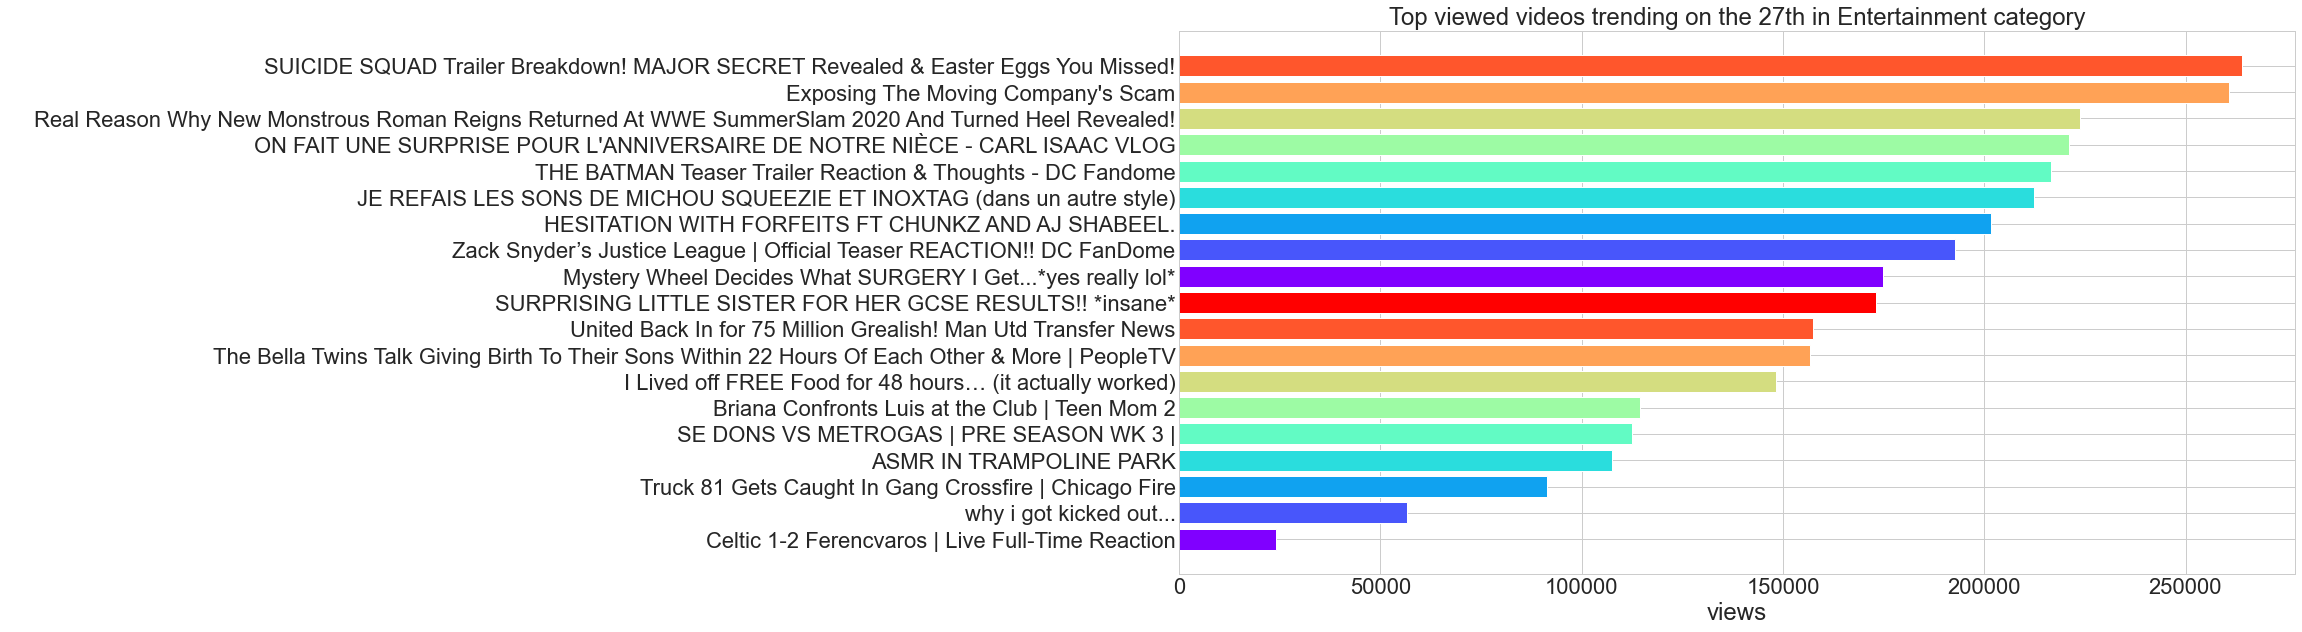

In [82]:
# take a look at which videos were viewed the most
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

plt.title('Top viewed videos trending on the 27th in Entertainment category')
plt.xlabel('views')
plt.ylabel(' ')

df_e27 = df_e27.sort_values(by=['view_count'],ascending=True)
df_e27.reset_index(drop=True, inplace=True)

df_e27_top = df_e27[1:20]
plt.barh(df_e27_top['title'], df_e27_top['view_count'], color=colors)



Why was the "A$AP Rocky Answers 18 Questions From Rihanna" video trending? Which key words were popular on google?

In [135]:
kw_list = ['as\$p','Rocky','Rhianna']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-31',geo='US',gprop='')
rhiaasap = pytrends.interest_over_time()
rhiaasap2 = rhiaasap
rhiaasap2 = rhiaasap2.reset_index()
rhiaasap2.columns = ['day','as$p','Rocky','Rhianna','ispartial']
rhiaasap2 = pd.melt(rhiaasap2, id_vars = ['day'], value_vars = ['as$p','Rocky','Rhianna'])
rhiaasap2.columns = ['day','term','count']

### Plot 25 Google interest over time for terms 'as\$p','Rocky', and 'Rhianna'

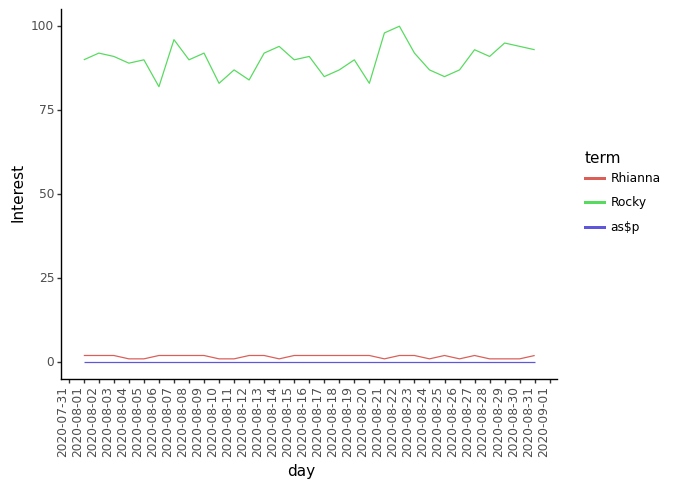

<ggplot: (7017983197)>

In [136]:
(ggplot(rhiaasap2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

It seems like "Rocky" is a popular search term.

### Plot 25 Most like videos in "Entertainment" category on 8/27/20

<BarContainer object of 24 artists>

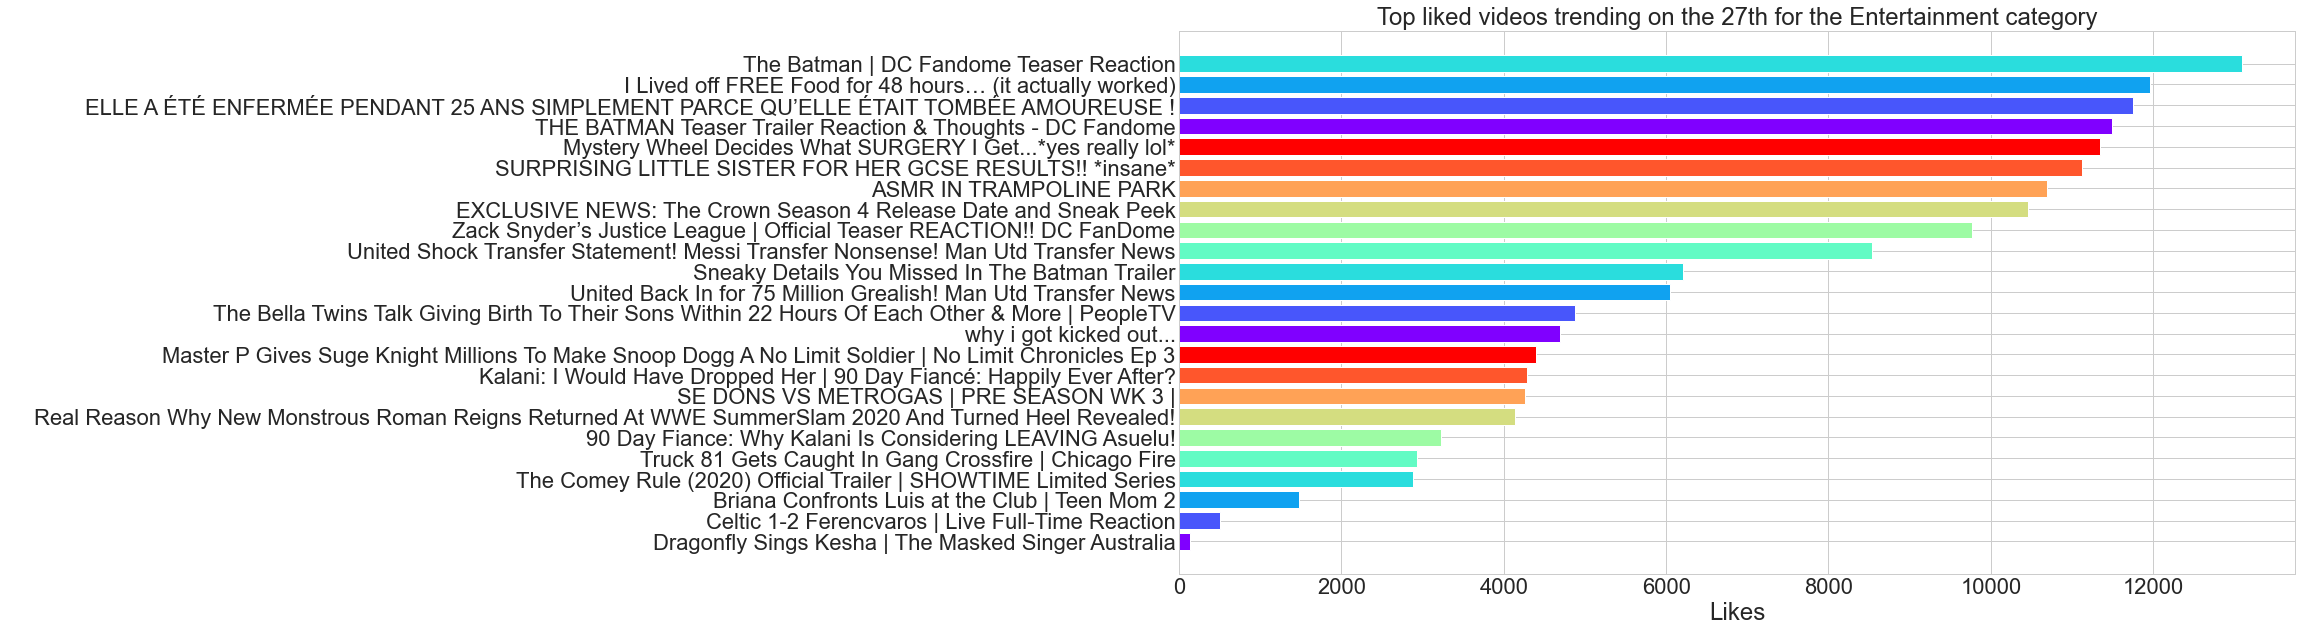

In [86]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top liked videos trending on the 27th for the Entertainment category')
plt.xlabel('Likes')
plt.ylabel(' ')

df_e27 = df_e27.sort_values(by=['likes'],ascending=True)
df_e27.reset_index(drop=True, inplace=True)

df_e27_top2 = df_e27[1:25]
plt.barh(df_e27_top2['title'], df_e27_top2['likes'], color=colors)


### Plot 26 Wordcloud for "Entertainment" category on 8/29/20

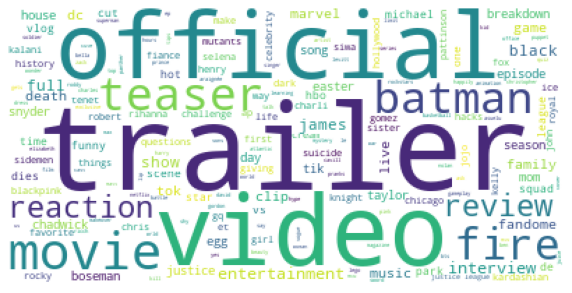

In [87]:
# Create a word cloud for "Entertainment" category from August 29th


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(df_e29))
tags = df_e29['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(df_e29['title'].str.lower())
all_str = all_titles + ' ' + all_tags
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_str)


rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



### Plot 27 Top words in the title and tags vs their count in Entertainment 08/29/20

<BarContainer object of 20 artists>

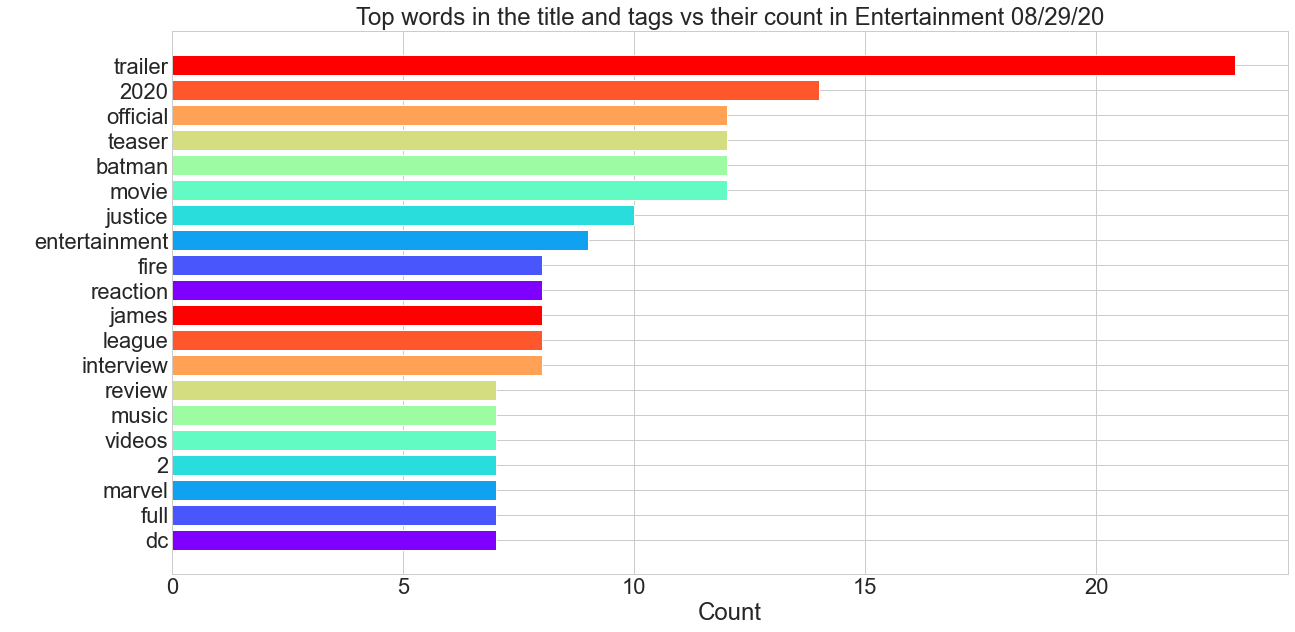

In [88]:
# Take a look at which words were popular in tags in video titles on the 29th
filtered_words = [word for word in all_str.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

plt.style.use('seaborn-whitegrid')
rcParams.update({'font.size': 20})

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the title and tags vs their count in Entertainment 08/29/20')
plt.xlabel('Count')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

Unlike the other two days, "boseman" was used over 10 times in titles and tags.

### Videos trending on the 29th with term "boseman" in title or tag

In [89]:
# Find which videos contain the word "boseman"
df_e29[df_e29['title'].str.contains("boseman", case=False)]['title']

0     'Black Panther' Star Chadwick Boseman Dies at ...
16    Chadwick Boseman's Marvel Family, Fellow Stars...
50                           R.I.P. Chadwick Boseman...
Name: title, dtype: object

As expected, it seems like it is due to videos being relased to the death of Chadwick Boseman on 08/28/20.

In [94]:
kw_list = ['Kevin Hart','Chadwick Boseman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-24T01 2020-08-30T05',geo='US',gprop='')
Boseman = pytrends.interest_over_time()
Boseman2 = Boseman
Boseman2 = Boseman2.reset_index()
Boseman2.columns = ['day','Kevin Hart','Chadwick Boseman','ispartial']
Boseman2 = pd.melt(Boseman2, id_vars = ['day'], value_vars = ['Kevin Hart','Chadwick Boseman'])
Boseman2.columns = ['day','term','count']

### Plot 28 Google interest over time for "Chadwick Boseman" vs "Kevin Hart"

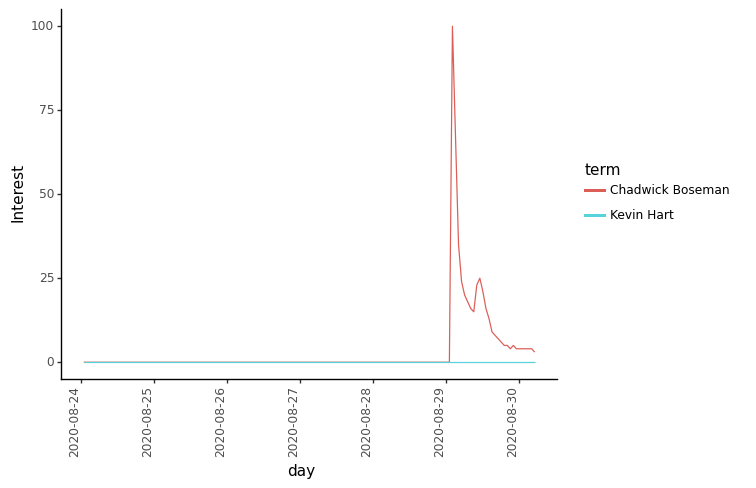

<ggplot: (7014244493)>

In [95]:
(ggplot(Boseman2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
)

### Plot 29 Number of likes for videos trending in the "Entertainment" category on 8/29/20 

<BarContainer object of 24 artists>

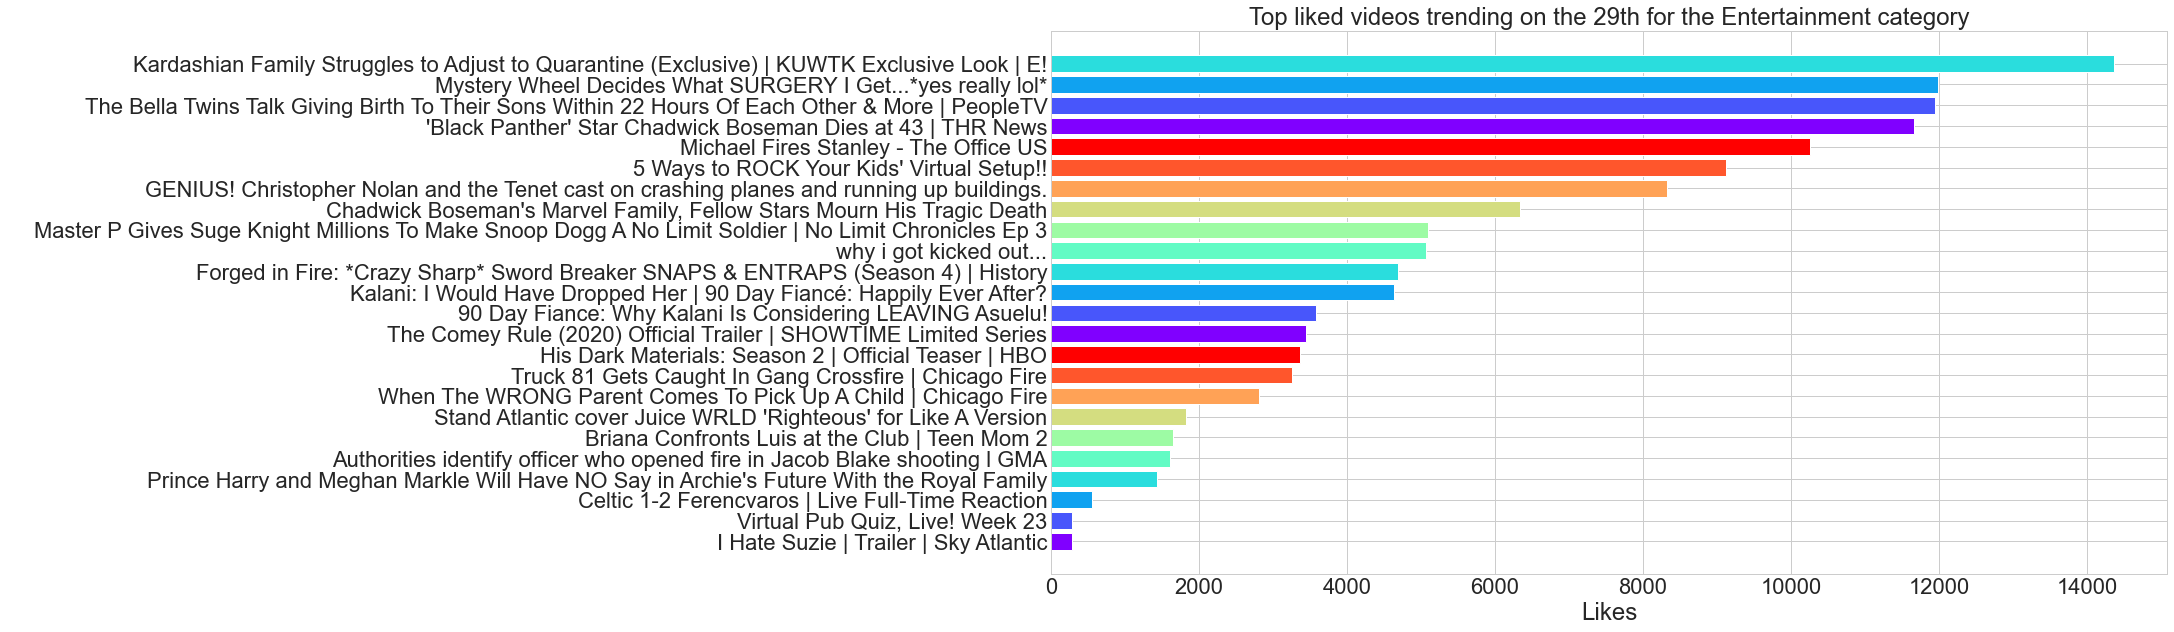

In [96]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top liked videos trending on the 29th for the Entertainment category')
plt.xlabel('Likes')
plt.ylabel(' ')

df_e29 = df_e29.sort_values(by=['likes'],ascending=True)
df_e29.reset_index(drop=True, inplace=True)

df_e29_top2 = df_e29[1:25]
plt.barh(df_e29_top2['title'], df_e29_top2['likes'], color=colors)

### Plot 30 Top viewed videos trending in the "Entertainment" category on 8/29/20 

<BarContainer object of 24 artists>

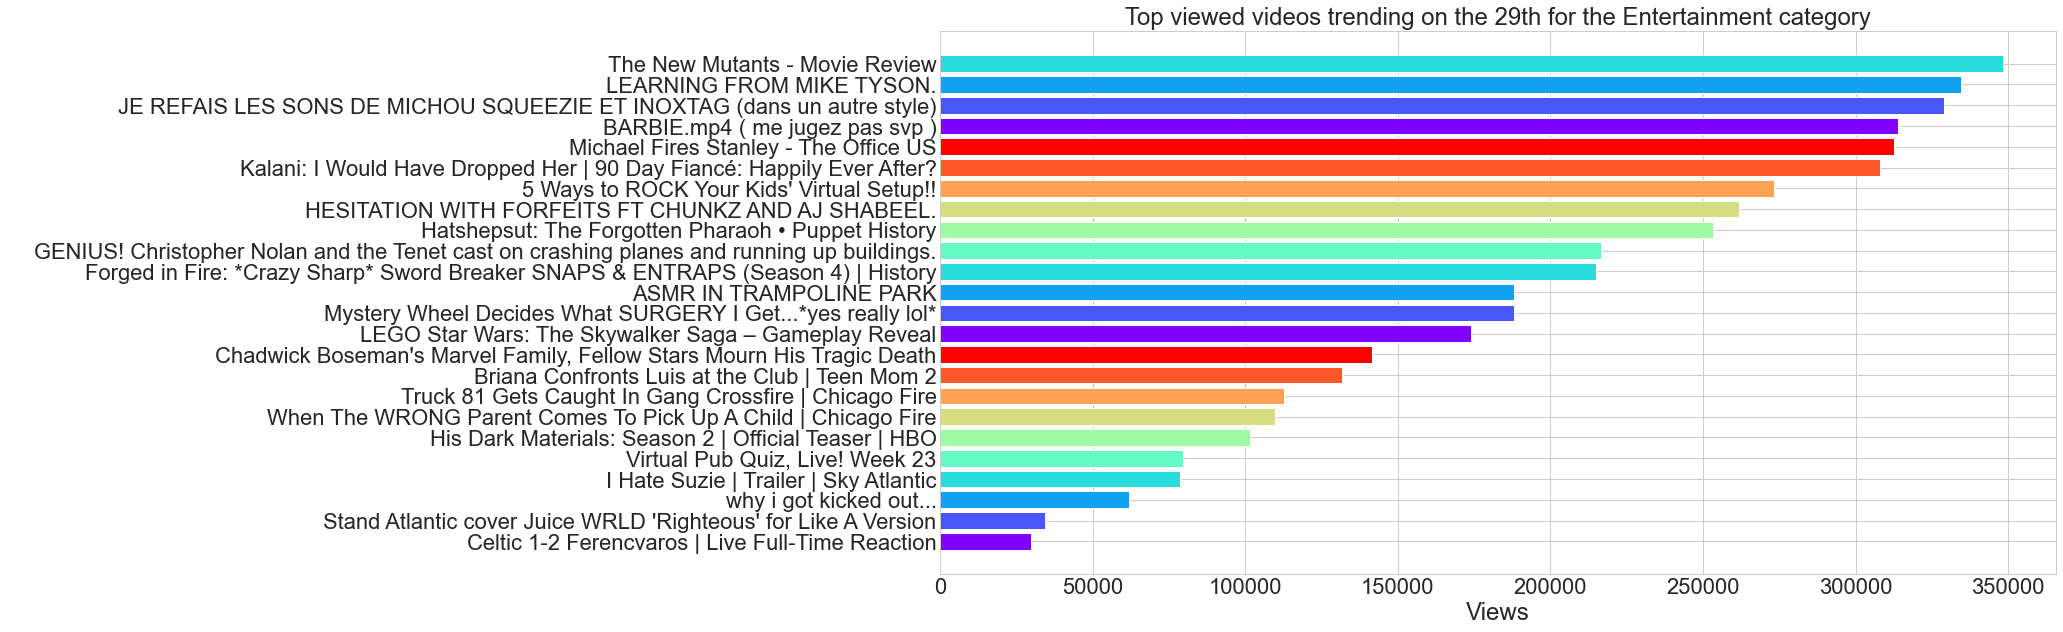

In [97]:
# take a look at which videos were rated highly
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top viewed videos trending on the 29th for the Entertainment category')
plt.xlabel('Views')
plt.ylabel(' ')

df_e29 = df_e29.sort_values(by=['view_count'],ascending=True)
df_e29.reset_index(drop=True, inplace=True)

df_e29_top2 = df_e29[1:25]
plt.barh(df_e29_top2['title'], df_e29_top2['view_count'], color=colors)

### Plot 31 Channels with multiple trending videos in the "Entertainment" category

<BarContainer object of 30 artists>

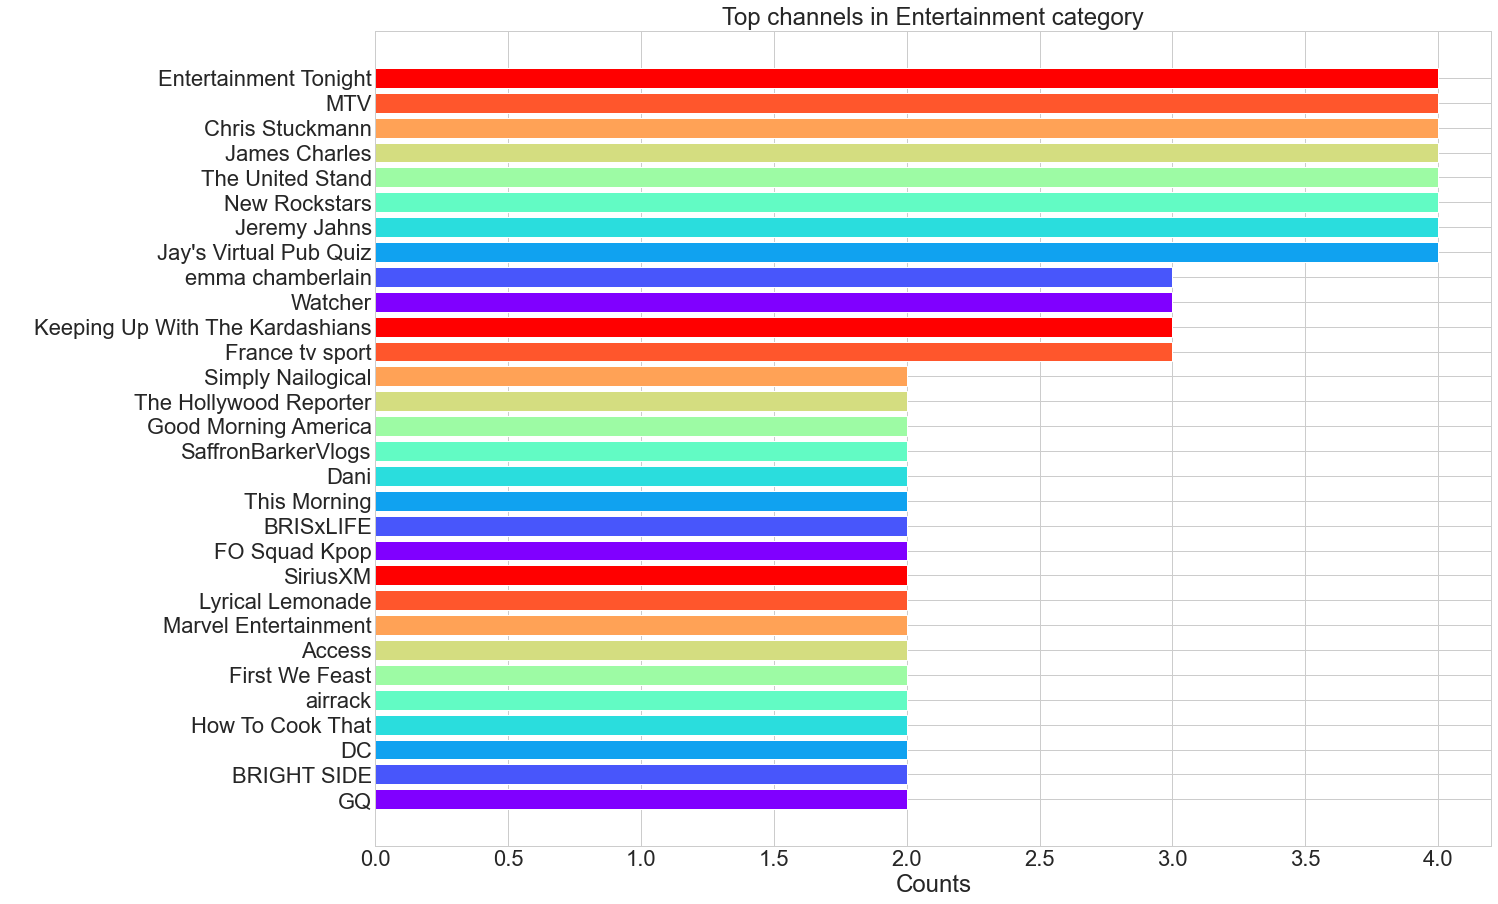

In [98]:
# Combine same videos (two videos are in the df twice for all three days)
group = df_e.groupby(['title','channelTitle','categories','categoryId','tags','publishedAt']).mean()
df_eall = group.reset_index()

all_channels = df_eall['channelTitle']

counted_words = collections.Counter(all_channels)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)
    
words = pd.DataFrame(words)    
counts = pd.DataFrame(counts)
df_f = pd.concat([words, counts],axis=1)
df_f.columns = ['words','count']
df_f.sort_values(by = ['count'], inplace=True)

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 15

plt.title('Top channels in Entertainment category')
plt.xlabel('Counts')
plt.ylabel(' ')
plt.barh(df_f['words'], df_f['count'], color=colors)

Since top words on wordcloud plot was Batman, channels that create content related to the Batman movie is expected to be on this list.

Three out of 4 trending videos by "New Rockstars" channel is related to the Batman movie trailer.

### Videos trending from channel "New Rockstars"

In [99]:
df_eall[df_eall['channelTitle'].str.contains("New Rockstars")]['title']

103    Justice League Snyder Cut Trailer Breakdown! E...
161    SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...
177    THE BATMAN TRAILER REACTION! Robert Pattinson ...
179    THE BATMAN Trailer Breakdown! Riddler Clue SOL...
Name: title, dtype: object

### Batman related videos

"Batman was the top key word used in titles and tags for all three days analyzed. How many Batman movie related videos were trending?

### List of all Batman related videos  that were on the trending page

In [100]:
batman_title = english_vids[english_vids['title'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
batman_tags = english_vids[english_vids['tags'].str.contains("Batman", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_title = english_vids[english_vids['title'].str.contains("Gotham", case=False)][['title','channelTitle','publishedAt','view_count']]
gotham_tags = english_vids[english_vids['tags'].str.contains("gotham", case=False)][['title','channelTitle','publishedAt','view_count']]

batman = batman_title.append(batman_tags)
batman = batman.append(gotham_title)
batman = batman.append(gotham_tags)


batman = batman.groupby(['title','channelTitle','publishedAt']).mean()
batman = batman.sort_values(by = 'view_count',ascending=False)
batman.reset_index()

title           channelTitle  \
0                      The Batman - DC FanDome Teaser  Warner Bros. Pictures   
1           Wonder Woman 1984 - Official Main Trailer  Warner Bros. Pictures   
2   Zack Snyder’s Justice League | Official Teaser...                HBO Max   
3   THE SUICIDE SQUAD – DC FanDome Exclusive Sneak...  Warner Bros. Pictures   
4                              Big Hulk VS Siren Head                  FatTV   
5   Travis Scott - The Plan (From the Motion Pictu...        TravisScottVEVO   
6             Gotham Knights - World Premiere Trailer                     DC   
7   The Batman Trailer 2021 Breakdown and Easter E...      Emergency Awesome   
8         The Batman - Official Trailer (My Thoughts)           Jeremy Jahns   
9                                Tenet - Movie Review        Chris Stuckmann   
10  THE BATMAN Trailer Breakdown! Riddler Clue SOL...          New Rockstars   
11  The BATMAN Trailer Every EASTER EGG and Refere...            ScreenCrush   
12  THE BATMAN TRAILER REACTION! Robert Pattinson ...          New Rockstars   
13                        The Batman Trailer REACTION     Beyond The Trailer   
14  Justice League Snyder Cut Trailer Breakdown! E...          New Rockstars   
15            The Batman | DC Fandome Teaser Reaction              Hyper RPG   
16  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...          New Rockstars   
17    Sneaky Details You Missed In The Batman Trailer                 Looper   
18  The Batman - DC FanDome Official Teaser Reacti...                  RT TV   
19  THE BATMAN Teaser Trailer Reaction & Thoughts ...      Black Nerd Comedy   
20  Zack Snyder’s Justice League | Official Teaser...             Blind Wave   

             publishedAt    view_count  
0   2020-08-23T00:57:22Z  1.963180e+07  
1   2020-08-22T17:27:11Z  1.332686e+07  
2   2020-08-22T21:52:58Z  9.707570e+06  
3   2020-08-22T19:25:56Z  4.969617e+06  
4   2020-09-04T12:00:42Z  3.639876e+06  
5   2020-08-22T04:00:05Z  2.482372e+06  
6   2020-08-22T17:34:48Z  2.240442e+06  
7   2020-08-23T02:25:51Z  1.251786e+06  
8   2020-08-23T06:20:53Z  9.486062e+05  
9   2020-08-27T13:00:02Z  7.667253e+05  
10  2020-08-24T20:47:15Z  7.306661e+05  
11  2020-08-23T18:47:04Z  6.170347e+05  
12  2020-08-23T03:35:14Z  5.540280e+05  
13  2020-08-23T01:39:43Z  4.798435e+05  
14  2020-08-25T22:03:54Z  4.196525e+05  
15  2020-08-23T08:27:42Z  3.480212e+05  
16  2020-08-26T19:57:05Z  3.197420e+05  
17  2020-08-23T20:00:06Z  3.061860e+05  
18  2020-08-23T05:54:19Z  2.870000e+05  
19  2020-08-23T04:55:03Z  2.117385e+05  
20  2020-08-23T19:30:01Z  1.857200e+05

In [101]:
len(batman)

21

Interestinlgy, even though Suicide Squad movie trailer was also released on the same day as the Batman movie, only one video related to Suicide Squad is trending other than the official trailer. Also, vidoes about the SUICIDE SQUAD trailer (#11) got on the trending page even though it was published 5 days after the trailer was released.

### List of all Suicide Squad related videos that were on the trending page

In [102]:
squad_title = english_vids[english_vids['title'].str.contains("SUICIDE SQUAD", case=False)][['title','channelTitle','view_count']]
squad_tag = english_vids[english_vids['tags'].str.contains("SUICIDE SQUAD", case=False)][['title','channelTitle','view_count']]
squad = squad_title.append(squad_tag)
squad = squad.groupby(['title','channelTitle']).mean()
squad = squad.sort_values(by = 'view_count',ascending=False)
squad.reset_index()

title           channelTitle  \
0          Wonder Woman 1984 - Official Main Trailer  Warner Bros. Pictures   
1  THE SUICIDE SQUAD – DC FanDome Exclusive Sneak...  Warner Bros. Pictures   
2  Suicide Squad: Kill the Justice League Officia...                     DC   
3  Suicide Squad: Kill the Justice League - Offic...               GameSpot   
4  SUICIDE SQUAD Trailer Breakdown! MAJOR SECRET ...          New Rockstars   

     view_count  
0  1.332686e+07  
1  4.969617e+06  
2  4.744251e+06  
3  3.661205e+05  
4  3.197420e+05

In [103]:
kw_list = ['Suicide Squad','Batman']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-09-01',geo='US',gprop='')
batmanvssquad = pytrends.interest_over_time()
batmanvssquad2 = batmanvssquad
batmanvssquad2 = batmanvssquad2.reset_index()
batmanvssquad2.columns = ['day','Suicide Squad','Batman','ispartial']
batmanvssquad2 = pd.melt(batmanvssquad2, id_vars = ['day'], value_vars = ['Suicide Squad','Batman'])
batmanvssquad2.columns = ['day','term','count']

### Plot 32 Google interest over time for terms 'Batman', and 'Suicide Squad'

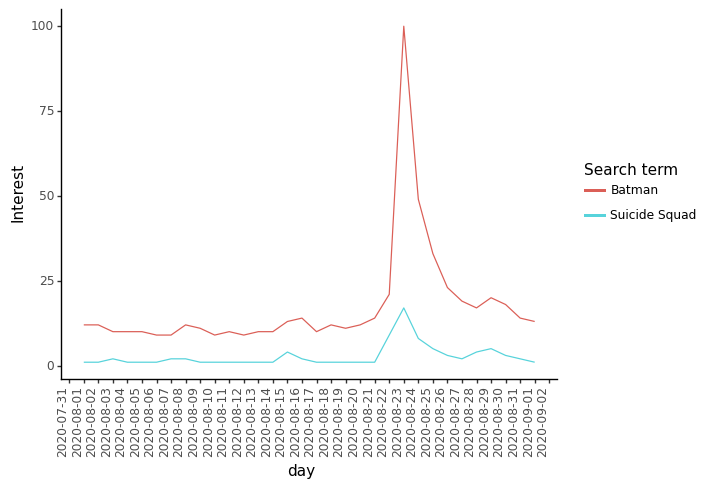

<ggplot: (7014410881)>

In [104]:
(ggplot(batmanvssquad2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

It is clear why videos from some channels such as DC and New Rockstars and Jeremy Jahns (both superhero commentary channels) are trending (because of interest in the new Batman movie).

The other channels with multiple trending videos related to influencers with large followings (Kardashians (popular celebrity), James Charles (21.2M subscribers as of 8/26/2020), and emma chamberlain (9.34 M). This makes sense since many subscribers get notified when the channels upload new videos. Therefore, view counts and engagement would grow rapidly. 


But why are (how does) small channels such as SafferonBarkerVlogs (1.1M ) also have more than one video trending?


In [105]:
kw_list = ['James Charles','Manchester United','The United Stand']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','Manchester United','The United Stand','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','Manchester United','The United Stand'])
youtubers2.columns = ['day','term','count']

### Plot 33 Google interest over time for channel names. 'Manchester United','James Charles','The United Stand'

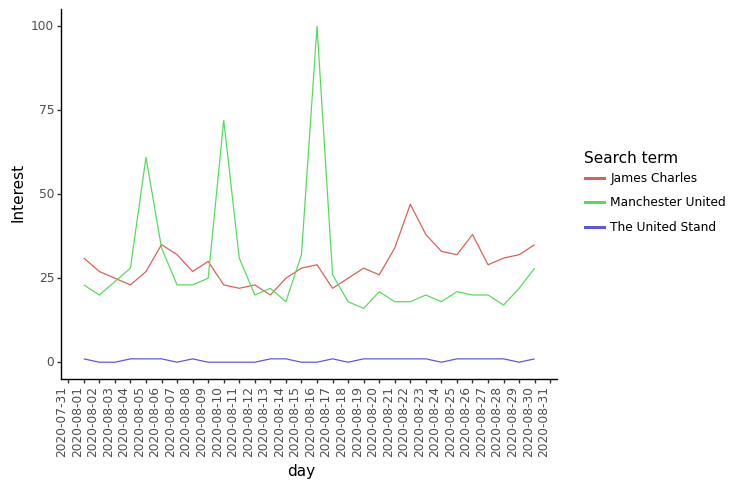

<ggplot: (7016224081)>

In [106]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [107]:
kw_list = ['James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand'])
youtubers2.columns = ['day','term','count']

### Plot 34 Google interest over time for channel names. 'James Charles','Emma Chamberlain','Saffron Barker','Dani','The United Stand'


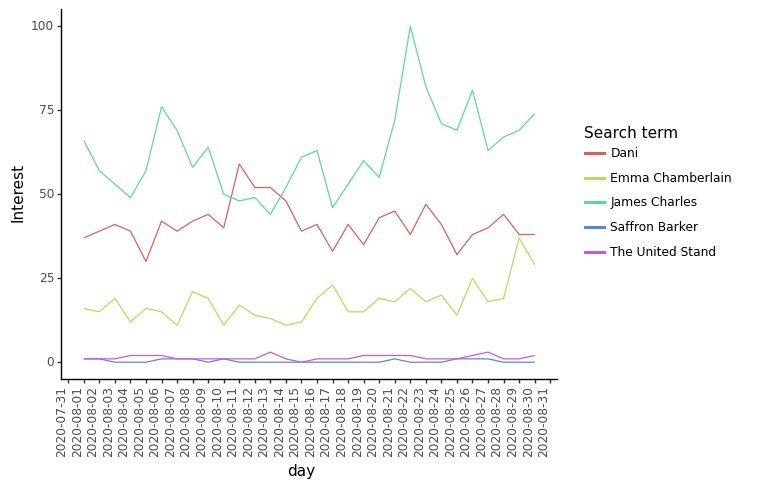

<ggplot: (7014157501)>

In [108]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

When we check the google interest over time for their names, youtubers with large followings have a interest score while the small youtubers don't.

### Comparing videos by a large vs. a small youtuber.

Comparing titles of videos by James Charles with the titles of vidoes by SaffronBarkerVlogs to see if there's hint in the titles and tags for their trending videos.

### Videos by 'James Charles'

In [109]:
df_eall[df_eall['channelTitle'].str.contains("James Charles")][['title','channelTitle','tags','publishedAt']]

title   channelTitle  \
63   Emma Chamberlain Picks My Outfits For A Week!  James Charles   
75               Giving JoJo Siwa A FULL MAKEOVER!  James Charles   
84       I Bought My First Home! 2020 House Tour 🏡  James Charles   
162               SURPRISE! We Got A New Puppy!! 🐶  James Charles   

                                                  tags           publishedAt  
63   james|james charles|makeup artist|mua|covergir...  2020-09-01T19:00:08Z  
75   james|james charles|makeup artist|mua|covergir...  2020-08-21T19:00:06Z  
84   james|james charles|makeup artist|mua|covergir...  2020-08-25T19:00:10Z  
162  james|james charles|makeup artist|mua|covergir...  2020-09-04T19:00:01Z

In [110]:
df_eall[df_eall['channelTitle'].str.contains("emma chamberlain")][['title','channelTitle','tags','publishedAt']]

title      channelTitle  \
50   DOING JAMES CHARLES MAKEUP *WE'RE BACK?*  emma chamberlain   
85                               I CAN'T COOK  emma chamberlain   
215            WHAT MY LIFE IS REALLY LIKE...  emma chamberlain   

                                                  tags           publishedAt  
50   emma chamberlain|emma chambie|vlog|james charl...  2020-09-01T19:00:08Z  
85   emma chamberlain|emma chambie|vlog|cooking wit...  2020-08-23T17:48:07Z  
215      emma chamberlain|emma chambie|vlog|daily vlog  2020-08-16T19:00:20Z

### Videos by 'SaffronBarkerVlogs'

In [111]:
df_eall[df_eall['channelTitle'].str.contains("SaffronBarkerVlogs")][['title','channelTitle','tags','publishedAt']]

title        channelTitle  \
93                    I bought my dream house!! 😭😍  SaffronBarkerVlogs   
234  baby sitting + a road trip to my boyfriends!!  SaffronBarkerVlogs   

                                                  tags           publishedAt  
93   saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-26T18:00:00Z  
234  saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-23T19:45:58Z

A couple of observations: 
1. James Charles' videos have titles and tags that includes individuals' names that are famous such as 'JoJo Siwa' (11.8M subscribers), Emma Chamberlain (9.3M), and himself.
2. The both James Charles and SaffronBarkerVlogs have a trending new house videos and their titles are remarkably similar. 

I think there are two possiblities:
1. SaffronBarkerVlogs' videos trended because her title was similar to another trending video's title. or
2. The words that were used in the titles were high of interest.

In [112]:
kw_list = ['James Charles','baby sitting','boyfriends','dream house','road trip']
pytrends = TrendReq(hl='US',tz=360)
pytrends.build_payload(kw_list,timeframe='2020-08-01 2020-08-30',geo='US',gprop='')
youtubers = pytrends.interest_over_time()
youtubers2 = youtubers
youtubers2 = youtubers2.reset_index()
youtubers2.columns = ['day','James Charles','baby sitting','boyfriends','dream house','road trip','ispartial']
youtubers2 = pd.melt(youtubers2, id_vars = ['day'], value_vars = ['James Charles','baby sitting','boyfriends','dream house','road trip'])
youtubers2.columns = ['day','term','count']

### Plot 35 Google interest over time for terms used in titles. 'James Charles','baby sitting','boyfriends','dream house','road trip'

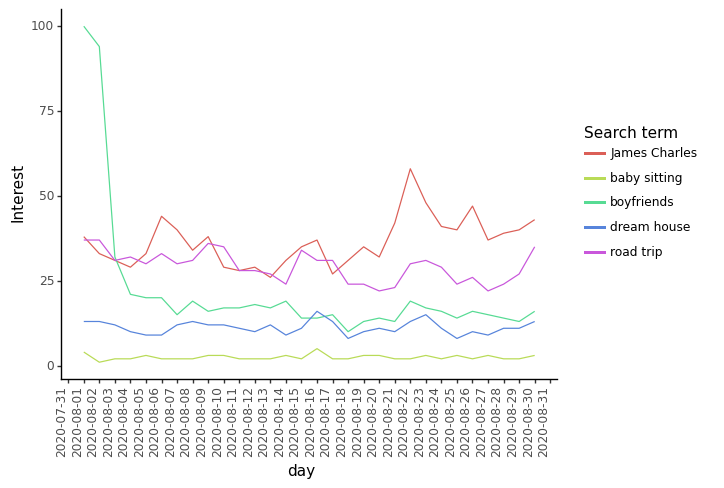

<ggplot: (7013187537)>

In [113]:
(ggplot(youtubers2, aes(x='day',y='count',group='term')) 
 + geom_line(aes(color='term'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

'Road trip' and 'dream house' are key words that are searched a lot.

In [114]:
english_vids[english_vids['title'].str.contains("road trip", case=False)][['title','channelTitle','tags','publishedAt']]

title  \
2422                       Road trip to see the girls!   
2423                       Road trip to see the girls!   
2424                       Road trip to see the girls!   
2425                       Road trip to see the girls!   
2426                       Road trip to see the girls!   
2700  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2701  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2702  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
2703  TOP 10 CARAVAN TOWING TIPS - Road Trip Australia   
3286     baby sitting + a road trip to my boyfriends!!   

                                   channelTitle  \
2422                                 Lily Grace   
2423                                 Lily Grace   
2424                                 Lily Grace   
2425                                 Lily Grace   
2426                                 Lily Grace   
2700  Trip In A Van - RoadTrip Australia Series   
2701  Trip In A Van - RoadTrip Australia Series   
2702  Trip In A Van - RoadTrip Australia Series   
2703  Trip In A Van - RoadTrip Australia Series   
3286                         SaffronBarkerVlogs   

                                                   tags           publishedAt  
2422  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2423  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2424  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2425  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2426  mescia twins|twins|sisters|sibling tag|sister ...  2020-08-29T06:49:01Z  
2700                                             [none]  2020-08-30T05:00:06Z  
2701                                             [none]  2020-08-30T05:00:06Z  
2702                                             [none]  2020-08-30T05:00:06Z  
2703                                             [none]  2020-08-30T05:00:06Z  
3286  saffron|barker|second|channel|daily|vlogs|vlog...  2020-08-23T19:45:58Z

Get top trending terms on Google on 9/1/2020 and 9/2/2020

### Experiment 1

Ran these to collect trending words on Google on 9/1/2020 and 9/2/2020.

In [115]:
# key words trending on 9/1/2020 (ran on 9/1/2020)
#trending0901 = pytrends.trending_searches(pn='united_states')
#trending0901.columns = ['words']
#trending0901.head()
# trending0901.to_excel('trending0901.xls',index=False)

In [116]:
# key words trending on 9/2/2020 (ran on 9/2/2020)
#trending0902 = pytrends.trending_searches(pn='united_states')
#trending0902.columns = ['words']
#trending0902
# trending0902.to_excel('trending0902.xls',index=False)

In [342]:
# Get files saved for trending
filenames = [i for i in glob.glob('trending0*.{}'.format('xls'))]
filenames

['trending0902.xls', 'trending0901.xls']

In [343]:
# Extract the dates from file names
filenames[0][8:12]

'0902'

In [344]:
# Create a dataframe with trending words from the files and add trending date column
# Extract columnnames
df = pd.read_excel(filenames[0])
columnnames = df.columns
df_names = []
# Create empty dataframe with columnnames
trends = pd.DataFrame(columns = columnnames)
for f in filenames:
    # Read file
    d = pd.read_excel(f) 
    # Extract the dates from file names
    d['file'] = f[0:12]
    d['trending_date'] = '2020' + f[8:12]
    trends = trends.append(d)
    df_names.append(f[0:12])
# Reset index
trends.reset_index(inplace=True)

Videos trending with words

In [345]:
# Testing out loop
# Searc word in all dataframe in list and output a list

# Create a list of dataframes
dfs = [df_0901,df_0902,df_0903,df_0904,df_0905]
test_df = pd.DataFrame(columns = df_e901.columns)
rows = []
for df in dfs:
    title_df = df[df['title'].str.contains('Leonard Fournette', case=False)]
    test_df = test_df.append(title_df)
    num_vids = len(test_df)
    rows.append(num_vids)

rows

[0, 0, 0, 1, 2]

In [346]:
# Do the same for the whole word list

words = trends['words']
dfs = [df_0901,df_0902,df_0903,df_0904,df_0905,df_0906]
num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    rows = []
    for df in dfs:
        title_df = df[df['title'].str.contains(str_tofind, case=False)]
        tag_df =df[df['tags'].str.contains(str_tofind, case=False)]
        temp_df = pd.concat([tag_df,title_df])
        # Combine videos with same title and channeltitle
        temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
        temp_df.reset_index()
        num_vids = len(temp_df)
        rows.append(num_vids)
    num_vidslist.append(rows)


In [347]:
num_vidslist = pd.DataFrame(num_vidslist)
trending = pd.concat([trends,num_vidslist],axis=1)



In [348]:
trending.columns = ['rank','words','file','trendedongoogle','20200901','20200902','20200903','20200904','20200905','20200906']


In [349]:
# Count the number of videos for each key word
words = trending['words']

num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    title_df = english_vids[english_vids['title'].str.contains(str_tofind, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(str_tofind, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df.reset_index()

    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)
trending['total_videos'] = num_vidslist


In [350]:
trending = trending.sort_values(by=['total_videos'], ascending=False)
trending.reset_index(drop=True, inplace=True)


In [351]:
trend_0901 = trending[(trending.trendedongoogle=='20200901')].copy()
trend_0901.columns = ['rank','words','file','trendedongoogle','day1','day2','day3','day4','day5','day6','total_vids']
trend_0902 = trending[(trending.trendedongoogle=='20200902')].copy()
trend_0902.columns = ['rank','words','file','trendedongoogle','day-1','day1','day2','day3','day4','day5','total_vids']

trends = pd.concat([trend_0902,trend_0901])



In [363]:
trends['sum'] = trends.iloc[:, 5:10].sum(axis=1)

In [364]:
trends.reset_index(drop=True,inplace=True)

In [365]:
trends = trends.sort_values(by=['total_vids'],ascending=False)

In [366]:
trends.reset_index(drop=True,inplace=True)

In [367]:
trends.head()

rank         words          file trendedongoogle  day-1  day1  day2  day3  \
0    19       Celtics  trending0902        20200902    1.0     2     2     4   
1    12   Miley Cyrus  trending0901        20200901    NaN     5     8     8   
2     1  David Blaine  trending0902        20200902    1.0     1     4     4   
3    18       Nuggets  trending0902        20200902    1.0     1     1     0   
4     3  Keanu Reeves  trending0902        20200902    1.0     1     1     0   

   day4  day5  total_vids  day6  sum  
0     5     6           9   NaN   19  
1     7     7           9   6.0   35  
2     5     5           6   NaN   19  
3     0     2           4   NaN    4  
4     1     1           2   NaN    4

In [369]:
trends_days = trends.drop(['file','day-1','day6'], axis=1)
trends_days.columns=['rank','words','date','day1','day2','day3','day4','day5','total_vids','sum']
trends_days

rank                         words      date  day1  day2  day3  day4  \
0     19                       Celtics  20200902     2     2     4     5   
1     12                   Miley Cyrus  20200901     5     8     8     7   
2      1                  David Blaine  20200902     1     4     4     5   
3     18                       Nuggets  20200902     1     1     0     0   
4      3                  Keanu Reeves  20200902     1     1     0     1   
5      4                        Monica  20200901     0     2     2     2   
6     17            Rockets vs Thunder  20200902     0     1     1     2   
7      2             Leonard Fournette  20200901     0     0     0     1   
8      8                     ASAP Ferg  20200902     0     0     0     0   
9      7                  Kirk Cousins  20200902     0     0     0     0   
10    16                     Ed Markey  20200902     0     0     0     0   
11     2                  Alvin Kamara  20200902     0     0     0     0   
12     4                   Chris Cuomo  20200902     0     0     0     0   
13     5             After We Collided  20200902     0     0     0     0   
14     6                   Tiger Woods  20200902     0     0     0     0   
15    12                    Cinderella  20200902     0     0     0     0   
16     9                    Alex Morse  20200902     0     0     0     0   
17    10                      Novichok  20200902     0     0     0     0   
18    11                Jesse Metcalfe  20200902     0     0     0     0   
19     8                        Bruins  20200901     0     0     0     0   
20    13                    Transplant  20200902     0     0     0     0   
21    14                           JMU  20200902     0     0     0     0   
22    15                  Walmart Plus  20200902     0     0     0     0   
23     5                   Apple stock  20200901     0     0     0     0   
24     0                   Tesla stock  20200901     0     0     0     0   
25     7                  Loretta Lynn  20200901     0     0     0     0   
26     1                    Niecy Nash  20200901     0     0     0     0   
27     3                 John Thompson  20200901     0     0     0     0   
28    11                     U.S. Open  20200901     0     0     0     0   
29    18                      ZM stock  20200901     0     0     0     0   
30    17                   Bella Hadid  20200901     0     0     0     0   
31    16                  Alvin Kamara  20200901     0     0     0     0   
32    15              MLB trade rumors  20200901     0     0     0     0   
33    14       September 2020 calendar  20200901     0     0     0     0   
34    13              Pranab Mukherjee  20200901     0     0     0     0   
35    10                 Heat vs Bucks  20200901     0     0     0     0   
36     9                Mike Clevinger  20200901     0     0     0     0   
37     6                  Jackie Ormes  20200901     0     0     0     0   
38     0  Dancing With the Stars' 2020  20200902     0     0     0     0   
39    19                  Logan Lerman  20200901     0     0     0     0   

    day5  total_vids  sum  
0      6           9   19  
1      7           9   35  
2      5           6   19  
3      2           4    4  
4      1           2    4  
5      2           2    8  
6      2           2    6  
7      1           1    2  
8      0           1    0  
9      0           0    0  
10     0           0    0  
11     0           0    0  
12     0           0    0  
13     0           0    0  
14     0           0    0  
15     0           0    0  
16     0           0    0  
17     0           0    0  
18     0           0    0  
19     0           0    0  
20     0           0    0  
21     0           0    0  
22     0           0    0  
23     0           0    0  
24     0           0    0  
25     0           0    0  
26     0           0    0  
27     0           0    0  
28     0           0    0  
29     0           0    0  
30     0           

In [134]:
# All videos trending related to top google interest words on 09/01/2020 and 09/02/2020
df = []
newtrends = pd.DataFrame(df,columns = ['title','channelTitle','publishedAt','categoryId'])
words = trends['words']
num_vidslist = []
for w in words:
    str_tofind = r"\b" + w + r"\b"
    title_df = english_vids[english_vids['title'].str.contains(str_tofind, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(str_tofind, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt','categoryId']).mean()
    temp_df = temp_df.reset_index()
    temp_df = temp_df[['title','channelTitle','publishedAt','categoryId','likes']]
    newtrends=newtrends.append(temp_df)
newtrends = newtrends.groupby(['title','channelTitle','publishedAt']).mean()
newtrends = newtrends.reset_index()[['title','channelTitle','publishedAt']]
newtrends

title         channelTitle  \
0   A$AP Ferg - No Ceilings (Official Video) ft. L...         asapfergVEVO   
1               BTS Performs Dynamite | 2020 MTV VMAs                  MTV   
2   BTS Share Their Top 7 Favorite Music Videos & ...             MTV News   
3            Bill & Ted Face the Music - Movie Review      Chris Stuckmann   
4         Brandy and Monica go head-to-head in Verzuz            REVOLT TV   
5   CELTICS at RAPTORS | FULL GAME HIGHLIGHTS | Au...                  NBA   
6   CELTICS at RAPTORS | FULL GAME HIGHLIGHTS | Se...                  NBA   
7   Celtics Take Game 1: Why Raptors Fans Shouldn’...       BBALLBREAKDOWN   
8   Chris Paul holds back tears, blasts Scott Fost...          NBA on ESPN   
9                              David Blaine Ascension         David Blaine   
10            David Blaine Ascension: The key moments      The Independent   
11  David Blaine ties Dixie to Giant Balloons  | T...  The D'Amelio Family   
12  Doja Cat Performs Say So & Like That | 2020 MT...                  MTV   
13  I WAS THERE! How David Blaine flew helium ball...         Physics Girl   
14                In the cryochamber with Jaden Smith         David Blaine   
15  JAZZ at NUGGETS | FULL GAME HIGHLIGHTS | Septe...                  NBA   
16          Joe Rogan Experience #1527 - David Blaine          PowerfulJRE   
17  Lady Gaga Performs a Medley of Chromatica II, ...                  MTV   
18  MTV VMAs 2020: Lady Gaga and BTS Win Big, Show...            Billboard   
19      Miley Cyrus - Midnight Sky in the Live Lounge        BBCRadio1VEVO   
20        Miley Cyrus - Slide Away in the Live Lounge        BBCRadio1VEVO   
21  Miley Cyrus - my future (Billie Eilish cover) ...        BBCRadio1VEVO   
22  Monica x Lil Baby - Trenches (Produced By: The...       monicaofficial   
23  NUGGETS at JAZZ | FULL GAME HIGHLIGHTS | Augus...                  NBA   
24  OG Anunoby Hits Buzzer-Beater Game-Winner With...      Bleacher Report   
25  OG Anunoby’s Game-Winner Saves The Series for ...           NBA on TNT   
26  Pat McAfee Reacts To Leonard Fournette To The ...  The Pat McAfee Show   
27  RAPTORS at CELTICS | FULL GAME HIGHLIGHTS | Se...                  NBA   
28                Round 1 l Game 7 Rockets vs Thunder      Houston Rockets   
29  Stephen A. reacts to Celtics vs. Raptors Game ...                 ESPN   
30         Total meltdown madness 🤯 with Keanu Reeves       Taran Tactical   

                 publishedAt  
0  2020-08-27 16:00:08+00:00  
1  2020-08-31 00:52:29+00:00  
2  2020-08-28 16:09:47+00:00  
3  2020-08-30 13:00:06+00:00  
4  2020-09-01 03:13:35+00:00  
5  2020-08-30 19:46:11+00:00  
6  2020-09-02 00:16:57+00:00  
7  2020-09-01 00:27:16+00:00  
8  2020-09-03 05:15:34+00:00  
9  2020-09-02 16:48:48+00:00  
10 2020-09-02 18:03:06+00:00  
11 2020-08-31 17:00:10+00:00  
12 2020-08-31 01:34:18+00:00  
13 2020-09-04 19:04:27+00:00  
14 2020-09-02 17:03:20+00:00  
15 2020-09-02 03:00:16+00:00  
16 2020-08-18 19:00:08+00:00  
17 2020-08-31 01:14:46+00:00  
18 2020-08-31 06:23:12+00:00  
19 2020-09-01 11:15:30+00:00  
20 2020-09-01 11:15:48+00:00  
21 2020-09-01 11:15:13+00:00  
22 2020-08-31 19:23:39+00:00  
23 2020-08-31 03:17:33+00:00  
24 2020-09-04 02:04:32+00:00  
25 2020-09-04 04:17:49+00:00  
26 2020-09-03 17:00:06+00:00  
27 2020-09-04 01:24:17+00:00  
28 2020-09-03 04:47:40+00:00  
29 2020-09-04 14:47:38+00:00  
30 2020-09-03 18:36:41+00:00

In [ ]:
### Calculate the average trending after published date

In [311]:
# Convert trending date to date time format
english_vids['trending_date'] = pd.to_datetime(english_vids['trending_date'],format='%y.%d.%m')


In [312]:
english_vids['trend_date'] = english_vids['trending_date'].dt.date

In [128]:
# Convert trending date to date time format
english_vids['publishedAt'] = pd.to_datetime(english_vids['publishedAt'],format='%Y-%m-%d')
english_vids['pub_date'] = english_vids['publishedAt'].dt.date

In [129]:
english_vids['day_diff'] = english_vids['trend_date']-english_vids['pub_date']

### Average days videos are trending after they are published

In [131]:
english_vids['day_diff'].mean()

Timedelta('3 days 16:47:11.816847666')

### Youtube search result vs trending videos

In [ ]:
Comparing 

Used this to get youtube search results:
https://github.com/HermanFassett/youtube-scrape

Usage example:
    For "chadwick boseman":
    http://youtube-scrape.herokuapp.com/api/search?q=chadwick%20boseman&page=1
    
I got 4 pages of search result for 'batman' on 9/5/20, and 5 pages for 'chadwick boseman'. 

In [575]:
jsonfilenames = [i for i in glob.glob('Ytsearch_batman*.{}'.format('json'))]

In [576]:
jsonfilenames

['Ytsearch_batman_1.json',
 'Ytsearch_batman_4.json',
 'Ytsearch_batman_3.json',
 'Ytsearch_batman_2.json']

In [577]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
search_result = pd.DataFrame(columns = ['video.title','video.upload_date','uploader.username'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['results']) # Get a table from the first
    df2 = df.loc[:,('video.title','video.upload_date','uploader.username')] # Extract only id and category name
    search_result = search_result.append(df2)
search_result.columns = ['title','upload_date','channelTitle'] # Rename columns
search_result.reset_index(drop=True, inplace=True)

In [578]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
search_result = pd.DataFrame(columns = ['title','upload_date','channelTitle','views'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['results']) # Get a table from the first
    df2 = df.loc[:,('video.title','video.upload_date','uploader.username','video.views')] # Extract only id and category name
    df2.columns = ['title','upload_date','channelTitle','views'] # Rename columns
    search_result = search_result.append(df2)

search_result.reset_index(drop=True, inplace=True)



In [579]:
search_result.columns = ['title','upload_date','channelTitle','views'] # Rename columns
search_result.reset_index(drop=True, inplace=True)

In [580]:
search_result["views"] = search_result["views"].str.replace(',','')
search_result["views"] = search_result["views"].str.replace('views','')
search_result["views"] = search_result["views"].astype(float)

In [581]:
search_result_av = search_result.groupby(['title','upload_date','channelTitle']).mean()

In [582]:
search_result_av = search_result_av.reset_index()
len(search_result_av)

50

In [583]:
def get_past_date(str_days_ago):
    # set today (on the day of analysis)'s date
    TODAY = datetime.date(2020, 9, 5)
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return "Wrong Argument format"

In [584]:
print(get_past_date('5 months ago'))


2020-04-05


In [585]:
date = search_result_av['upload_date']

for dt in date:
    act_date = get_past_date(dt)
    search_result_av.loc[(search_result_av.upload_date == dt),['act_date']]= act_date



In [586]:
search_result_av.sort_values(by=['act_date'], ascending=False).head()

title   upload_date  \
16  Finales Alternativos Graciosos de Películas / ...  16 hours ago   
42  The Batman Ben Affleck 2022 RELEASE ON HBO MAX...   4 hours ago   
29  ROZBOR Traileru: BATMAN (2021) - Hádankář, Tuč...  13 hours ago   
9   BREAKING The Batman to shoot without Robert Pa...   5 hours ago   
1   BATMAN #98- Why Can't ALL Comic Books Be This ...  19 hours ago   

                   channelTitle    views    act_date  
16                    IMITANDUP  32161.0  2020-09-07  
42                       Warstu   1566.0  2020-09-07  
29                 Super Trendy   2997.0  2020-09-07  
9                ComicBookCast2   4553.0  2020-09-07  
1   Comics MATTER w/Ya Boi Zack   5420.0  2020-09-07

In [587]:
len(search_result_av[(search_result_av.act_date > '2020-08-21')])

38

In [595]:
batmanlimited = search_result_av[(search_result_av.act_date > '2020-08-21') & (search_result_av.act_date < '2020-09-04') ]
len(limited)

28

In [593]:
batmanlimited.head()

title upload_date  \
2           BATMAN (2021) Trailer Dublado do Filme DC  2 days ago   
3   BATMAN GOTHAM KNIGHTS Gameplay 4K (2021) PS5/X...  1 week ago   
8           BREAKING The Batman shuts down Production  2 days ago   
10  BREAKING! ROBERT PATTINSON TESTS POSITIVE | BA...  2 days ago   
11  Batman Gets New DC Super Friends Imaginext Sup...  3 days ago   

                              channelTitle      views    act_date  
2   FilmIsNow Movie Trailers International   236910.0  2020-09-03  
3                             MKIceAndFire  1566312.0  2020-08-29  
8                           ComicBookCast2    21782.0  2020-09-03  
10                       Everything Always    20837.0  2020-09-03  
11                             Just4fun290    23219.0  2020-09-02

In [432]:
jsonfilenames = [i for i in glob.glob('Ytsearch_boseman*.{}'.format('json'))]

In [433]:
jsonfilenames

['Ytsearch_boseman_3.json',
 'Ytsearch_boseman_2.json',
 'Ytsearch_boseman_5.json',
 'Ytsearch_boseman_4.json',
 'Ytsearch_boseman_6.json',
 'Ytsearch_boseman_1.json']

In [434]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
search_result = pd.DataFrame(columns = ['video.title','video.upload_date','uploader.username'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['results']) # Get a table from the first
    df2 = df.loc[:,('video.title','video.upload_date','uploader.username')] # Extract only id and category name
    search_result = search_result.append(df2)
search_result.columns = ['title','upload_date','channelTitle'] # Rename columns
search_result.reset_index(drop=True, inplace=True)

In [435]:
# Create a dataframe with categoryid, categoryname, and country
# Create empty dataframe 
search_result = pd.DataFrame(columns = ['title','upload_date','channelTitle','views'])
# Loop through json files
for f in jsonfilenames:
    d = pd.read_json(f)
    df = pd.json_normalize(d['results']) # Get a table from the first
    df2 = df.loc[:,('video.title','video.upload_date','uploader.username','video.views')] # Extract only id and category name
    df2.columns = ['title','upload_date','channelTitle','views'] # Rename columns
    search_result = search_result.append(df2)

search_result.reset_index(drop=True, inplace=True)



In [436]:
search_result.columns = ['title','upload_date','channelTitle','views'] # Rename columns
search_result.reset_index(drop=True, inplace=True)

In [437]:
search_result["views"] = search_result["views"].str.replace(',','')
search_result["views"] = search_result["views"].str.replace('views','')
search_result["views"] = search_result["views"].astype(float)

In [438]:
search_result_av = search_result.groupby(['title','upload_date','channelTitle']).mean()
search_result_av = search_result_av.reset_index()

In [446]:
def get_past_date(str_days_ago):
    # set today (on the day of analysis)'s date
    TODAY = datetime.date(2020, 9, 7)
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return "Wrong Argument format"

In [447]:
date = search_result_av['upload_date']

for dt in date:
    act_date = get_past_date(dt)
    search_result_av.loc[(search_result_av.upload_date == dt),['act_date']]= act_date




In [448]:
bosemanlimited = search_result_av[(search_result_av.act_date > '2020-08-22') & (search_result_av.act_date < '2020-09-05') ]

In [449]:
len(bosemanlimited)

75

In [450]:
bosemanlimited.head()

title upload_date  \
1  'Black Panther' Star Chadwick Boseman Dies Of ...  1 week ago   
2   'Black Panther' star Chadwick Boseman dies at 43  1 week ago   
3  'Black Panther' star Chadwick Boseman dies of ...  1 week ago   
4      A Tribute To Chadwick Boseman #WakandaForever  1 week ago   
5                  Actor Chadwick Boseman dead at 43  1 week ago   

           channelTitle      views    act_date  
1       CBS Los Angeles  1891070.0  2020-08-31  
2                   CNN  1388522.0  2020-08-31  
3  Good Morning America   773238.0  2020-08-31  
4           Screen Rant   464006.0  2020-08-31  
5              ABC News   314136.0  2020-08-31

In [462]:
boseman_title = english_vids[english_vids['title'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]
boseman_tags = english_vids[english_vids['tags'].str.contains("boseman", case=False)][['title','channelTitle','publishedAt','view_count']]
chadwick_title = english_vids[english_vids['title'].str.contains("chadwick", case=False)][['title','channelTitle','publishedAt','view_count']]
chadwick_tags = english_vids[english_vids['tags'].str.contains("chadwick", case=False)][['title','channelTitle','publishedAt','view_count']]

boseman = boseman_title.append(boseman_tags)
boseman = boseman.append(chadwick_title)
boseman = boseman.append(chadwick_tags)


boseman = boseman.groupby(['title','channelTitle','publishedAt']).mean()
boseman = boseman.sort_values(by = 'view_count',ascending=False)
boseman = boseman.reset_index()

In [569]:
t_b = boseman['title']
v = []
for t in t_b:
    count = 0
    c = boseman.loc[(boseman.title==t),'channelTitle'].values[0]
    count = len(bosemanlimited[(bosemanlimited.title==t)&(bosemanlimited.channelTitle==c)])
    if count>0:
        v.append(1)
        
    else:
        v.append(0)

sum(v)

10

10 videos out of 77 on the top search for Chadwick Boseman is trending.

In [573]:
batman = batman.reset_index()

In [597]:
t_b = batman['title']
v = []
for t in t_b:
    count = 0
    c = batman.loc[(batman.title==t),'channelTitle'].values[0]
    count = len(batmanlimited[(batmanlimited.title==t)&(batmanlimited.channelTitle==c)])
    if count>0:
        v.append(1)
        
    else:
        v.append(0)

sum(v)

0

In [596]:
batmanlimited

title  upload_date  \
2           BATMAN (2021) Trailer Dublado do Filme DC   2 days ago   
3   BATMAN GOTHAM KNIGHTS Gameplay 4K (2021) PS5/X...   1 week ago   
4   BATMAN GOTHAM KNIGHTS Gameplay Demo Mr. Freeze...  2 weeks ago   
5   BATMAN GOTHAM KNIGHTS Trailer (2021) PS5/Xbox ...  2 weeks ago   
8           BREAKING The Batman shuts down Production   2 days ago   
10  BREAKING! ROBERT PATTINSON TESTS POSITIVE | BA...   2 days ago   
11  Batman Gets New DC Super Friends Imaginext Sup...   3 days ago   
15  Everything Wrong With Batman vs Teenage Mutant...   4 days ago   
17           Gotham Knights - Official Reveal Trailer  2 weeks ago   
18  Gotham Knights - Official World Premiere Trail...  2 weeks ago   
19                               Hulk VS Green Batman   6 days ago   
20  Jeffrey Wright Didn't Recognize Colin Farrell ...   1 week ago   
26  No One Believes Batman is ACTUALLY Dead in Got...   2 days ago   
28  Playing as BATMAN in a MARVEL ONLY Tournament!...   3 days ago   
30  Reacting to New DC Movie Trailers! (The Batman...   1 week ago   
32                         Spider Hulk VS Iron Batman  2 weeks ago   
33  THE BATMAN (2021) Bruce Wayne First Look - DC ...   1 week ago   
35  THE BATMAN 2021 Trailer - Why EVERYONE is Talk...   3 days ago   
37         The Animated Batman Movie EVERYONE Ignored   1 week ago   
38               The Batman - Angry Trailer Reaction!   1 week ago   
39   The Batman - DC FanDome Teaser - Warner Bros. UK   1 week ago   
40          The Batman - DC FanDome Teaser REACTION!!   1 week ago   
41       The Batman - DC FanDome Teaser Reaction!!!!!   3 days ago   
43  The Batman Production Stooped over Robert Patt...   2 days ago   
44  The Batman Selina Kyle Catwoman Friend or Foe?...   2 days ago   
47  The Batman Will Show A More Emotional Bruce Wayne  2 weeks ago   
48  Why "The Batman" and "Joker" Could (and Should...   1 week ago   

                              channelTitle      views    act_date  
2   FilmIsNow Movie Trailers International   236910.0  2020-09-03  
3                             MKIceAndFire  1566312.0  2020-08-29  
4                             MKIceAndFire   328244.0  2020-08-22  
5                             MKIceAndFire  1056385.0  2020-08-22  
8                           ComicBookCast2    21782.0  2020-09-03  
10                       Everything Always    20837.0  2020-09-03  
11                             Just4fun290    23219.0  2020-09-02  
15                              CinemaSins   350118.0  2020-09-01  
17                                GameSpot   327998.0  2020-08-22  
18                                     IGN  2922834.0  2020-08-22  
19                              AvengersTV   116527.0  2020-08-30  
20                                SiriusXM   113157.0  2020-08-29  
26                                  Slcmof    17027.0  2020-09-03  
28                                TG Plays  1696481.0  2020-09-02  
30                             Ben Shapiro   353922.0  2020-08-29  
32                                   FatTV  7519457.0  2020-08-22  
33                                 Smasher   173113.0  2020-08-29  
35                               BobaTalks    13118.0  2020-09-02  
37                      WhatCulture Comics    64196.0  2020-08-29  
38                            AngryJoeShow   479953.0  2020-08-29  
39                         Warner Bros. UK  1420473.0  2020-08-29  
40                              Blind Wave   547457.0  2020-08-29  
41                     Embracing Normality    39776.0  2020-09-02  
43                          ComicBookCast2    13116.0  2020-09-03  
44                           New Rockstars    52591.0  2020-09-03  
47                             Screen Rant    38877.0  2020-08-22  
48                             ScreenCrush   108561.0  2020-08-29

### Experiment 2

In [452]:
# Top words in vidoes from 0904

# Combine videos so there are no dubplicates
titles = df_0904.groupby(['title','channelTitle','tags','publishedAt']).mean()
titles = titles.sort_values(by = 'view_count',ascending=False)
videos_t = titles.reset_index()

In [453]:
# Create a string for all words in title and tags in videos_t 
# (all videos with word trailer in tags and titles)


word_count_in_eachcell = pd.DataFrame(columns=['words','count','row'])
rows = range(0, len(videos_t))
tags = videos_t['tags'].str.lower()
for r in rows:
    str_incell = ''.join(tags[r])# had to remove space between quotation marks ' '
    str_incell = str_incell.replace('|',' ')

    filtered_words = [word for word in str_incell.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    counted_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
    counted_words['row']=r
    word_count_in_eachcell = pd.concat([word_count_in_eachcell,counted_words])
word_count_in_eachcell['count'] = word_count_in_eachcell['count'].astype(float)
word_count_in_eachcell2 = word_count_in_eachcell.groupby(['words','row']).mean()
word_count_in_eachcell2 = word_count_in_eachcell2.reset_index()


word_count_in_eachcell3=word_count_in_eachcell2.sample(frac=1).reset_index(drop=True)
all_tags = ' '.join(word_count_in_eachcell3['words']) 
all_titles = ' '.join(videos_t['title'].str.lower())
all_str = all_titles + ' ' + all_tags
all_wrds_trailer = all_str

In [454]:
all_wrds_trailer = all_wrds_trailer.replace('(','')
all_wrds_trailer = all_wrds_trailer.replace(')','')
all_wrds_trailer = all_wrds_trailer.replace('+','')
all_wrds_trailer = all_wrds_trailer.replace('&','')
all_wrds_trailer = all_wrds_trailer.replace(':','')

In [455]:
# clean up the string
# Remove foreign characters 
s = all_wrds_trailer
import string
printable = set(string.printable)
# filter foreign characters
string = ''.join(filter(lambda x: x in printable, s))

# Put it into a series
newwords = [word for word in string.split() if word not in stopwords]

# remove single character and two letter words
newwords = [i for i in newwords if len(i) > 2]

In [456]:
counted_words = collections.Counter(newwords)
c_words = pd.DataFrame(list(counted_words.items()),columns=['words','count'])
c_words['count'] = c_words['count'].astype(float)
toptrailer_words = c_words.sort_values(by=['count'],ascending=False)[(c_words['count']>10)].reset_index()
toptrailer_words.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


index       words  count
0     16       video   95.0
1      9        2020   94.0
2     43    official   58.0
3     55       music   56.0
4    331  highlights   35.0

In [457]:
pytrends = TrendReq(hl='US',tz=360)
words = toptrailer_words['words']

interests = []
for w in words:
    kw_list = [w]
    pytrends.build_payload(kw_list,timeframe='2020-08-30T12 2020-09-02T12',geo='US',gprop='')
    df_interest = pytrends.interest_over_time()
    df_interest2 = df_interest.reset_index()
    df_interest2.columns = ['day','count','ispartial']
    # Add up all the interest numbers and store it as 'interest'
    interest_c = sum(df_interest2['count'])
    interests.append(interest_c)


In [458]:
# Count the number of videos for each key word
words = toptrailer_words['words']
trending = pd.DataFrame(words, columns = ['words'])
words = trending['words']
num_vidslist = []
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle']).mean()
    temp_df = temp_df.reset_index()
    num_vids = len(temp_df)
    num_vidslist.append(num_vids)
num_vidslist = pd.DataFrame(num_vidslist)
trending_v = pd.concat([trending,num_vidslist],axis=1)
trending_v.columns = ['word','num_vids']


In [459]:
interests = pd.DataFrame(interests)
trending_trailer = pd.concat([trending_v,interests],axis=1)
trending_trailer.columns = ['word','numvids','interest']
trending_trailer = trending_trailer.sort_values(by =['numvids'], ascending=False)
trending_trailer.reset_index(drop=True, inplace=True)

In [ ]:
trending_trailer

In [ ]:
(ggplot(trending_trailer[2:len(trending_trailer)])
 + geom_point(aes(x='interest',y='numvids'))
 + theme_classic()
)


 

In [ ]:
# trending_trailer.to_excel('interest_trailer.xls', index=False)

p-value =  0.02896 for top 50 (tested on R)

### Experiment 3

### Entertainment

In [598]:
# Count the number of videos for each key word for each published day
words = ['Chadwick Boseman','James Charles','Batman']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','publishedAt'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','publishedAt']]
    temp_df['words'] = w 
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['publishedAt'] = pd.to_datetime(trailer_vidslist['publishedAt'])
trailer_vidslist['pub_date'] = trailer_vidslist['publishedAt'].dt.date

keyeword_vidcount = trailer_vidslist.groupby(['words','pub_date'])['pub_date'].count()

keyeword_vidcount = pd.DataFrame(keyeword_vidcount)
keyeword_vidcount.columns = ['counts']
keyeword_vidcount = keyeword_vidcount.reset_index()

In [599]:
# Create list of dates to fill data set (0 for no videos)

from datetime import date
dates = pd.date_range('2020-08-15','2020-09-03' ).tolist()
dates_p = []
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_p.append(date)

In [600]:

# Convert dates to string
dates_st = []
dates = keyeword_vidcount['pub_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyeword_vidcount['datest'] = dates_st
keyeword_vidcount_st = keyeword_vidcount.drop(columns = ['pub_date'])


In [601]:
# Compare dates of the count list and add missing dates with 0 video counts
df =[]
df_toadd= pd.DataFrame(df,columns=['datest','words','counts','color'])
words = ['Chadwick Boseman','James Charles','Batman']
for w in words:
    dates_c = keyeword_vidcount_st[(keyeword_vidcount_st['words']==w)]['datest']
    toadddates = set(dates_p).difference(dates_c)
    toadddates = pd.DataFrame(toadddates,columns=['datest'])
    toadddates['words'] = w
    toadddates['counts'] = '0'
    df_toadd = df_toadd.append(toadddates)
    
trailer_df = pd.concat([keyeword_vidcount_st,df_toadd])

In [602]:
trailer_df['datest'] = pd.to_datetime(trailer_df['datest'])
trailer_df['datest'] = trailer_df['datest'].dt.date
trailer_df['counts'] = trailer_df['counts'].astype(float)
trailer_df['cat'] = 'videos'
trailer_df['color'] = trailer_df['words']

In [603]:
# Count the number of videos for each key word for each trending day
words = ['Chadwick Boseman','James Charles','Batman']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','trending_date'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','trending_date']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','trending_date']]
    temp_df['words'] = w      
    temp_df['color'] = w   
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['trending_date'] = pd.to_datetime(trailer_vidslist['trending_date'])
trailer_vidslist['trending_date'] = trailer_vidslist['trending_date'].dt.date
    
# count the number of videos
keyword_trendingvids = trailer_vidslist.groupby(['words','trending_date'])['trending_date'].count()

keyword_trendingvids = pd.DataFrame(keyword_trendingvids)
keyword_trendingvids.columns = ['trending_counts']
keyword_trendingvids = keyword_trendingvids.reset_index()

In [604]:
# Convert dates to string
dates_st = []
dates = keyword_trendingvids['trending_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyword_trendingvids['datest'] = dates_st
keyword_trendingvids_st = keyword_trendingvids.drop(columns = ['trending_date'])

In [605]:
trailertrending_df = keyword_trendingvids_st
trailertrending_df['color'] = trailertrending_df['words']
words = ['Chadwick Boseman','James Charles','Batman']
for w in words:
    trailertrending_df.loc[trailertrending_df.words == w,'words']= w + ' trendingdate'

In [606]:
trailertrending_df['trending_counts'] = trailertrending_df['trending_counts'].astype(float)

In [607]:
trailertrending_df.columns = ['words', 'counts', 'datest','color']
trailertrending_df['cat'] = 'trending'

In [608]:
trailer_df['cat'] = 'published'

In [609]:
combined = pd.concat([trailer_df,trailertrending_df])

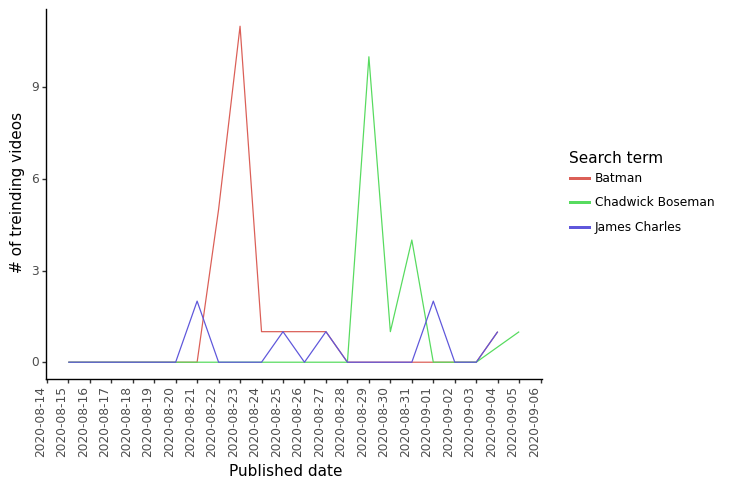

<ggplot: (7018583229)>

In [610]:
(ggplot(trailer_df, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='words'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('# of treinding videos')
 + xlab('Published date')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [611]:
trailer_df2 = trailer_df.copy()

In [612]:
batman_interest = batmanvssquad2[43:len(batmanvssquad2)].copy()
batman_interest['term']= 'Batman google'
batman_interest = batman_interest.reset_index(drop=True)
batman_interest.columns = ['datest','words','counts']

batman_interest['cat'] = 'interest'
batman_interest['color'] = 'Batman'

trailer_df2['counts'] = trailer_df2['counts']*10
compare = pd.concat([trailer_df2,batman_interest])

boseman_interest = Boseman2[(Boseman2['term']=='Chadwick Boseman')].copy()

boseman_interest['term'] = 'Chadwick Boseman google'
boseman_interest = boseman_interest.reset_index(drop=True)
boseman_interest.columns = ['datest','words','counts']
boseman_interest['cat'] = 'interest'
boseman_interest['color'] = 'Chadwick Boseman'
compare = pd.concat([compare,boseman_interest])







In [613]:
compare['datest'] = pd.to_datetime(compare['datest'])

In [614]:
james_interest = youtubers2[(youtubers2['term']=='James Charles')].copy()

james_interest['term'] = 'James Charles google'
james_interest = james_interest.reset_index(drop=True)
james_interest.columns = ['datest','words','counts']
james_interest['cat'] = 'interest'
james_interest['color'] = 'James Charles'
compare = pd.concat([compare,james_interest])

In [615]:
compare = compare[compare.datest > '2020-08-14']

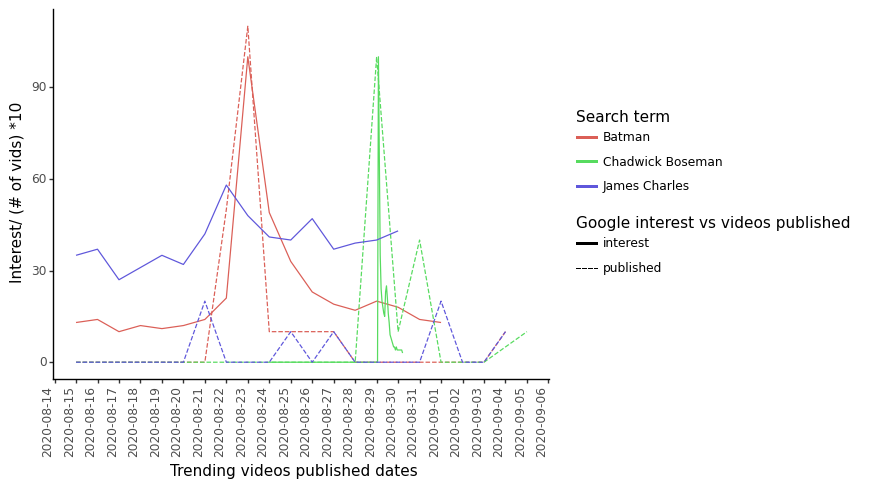

<ggplot: (7022759929)>

In [616]:
(ggplot(compare, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='color', linetype='cat'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest/ (# of vids) *10')
 + xlab('Trending videos published dates')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term', linetype = 'Google interest vs videos published')
)

In [617]:
combined['datest'] = pd.to_datetime(combined['datest'])


In [618]:
combined.head()

words  counts     datest   color        cat
0  Batman     5.0 2020-08-22  Batman  published
1  Batman    11.0 2020-08-23  Batman  published
2  Batman     1.0 2020-08-24  Batman  published
3  Batman     1.0 2020-08-25  Batman  published
4  Batman     1.0 2020-08-26  Batman  published

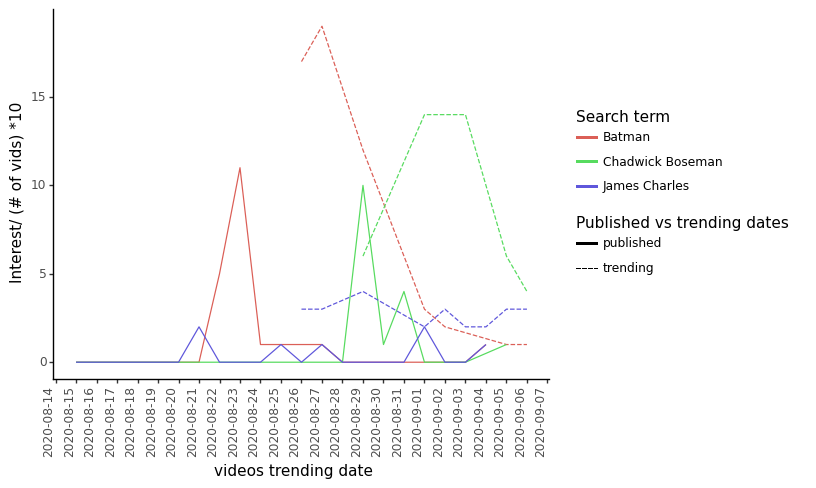

<ggplot: (7018582809)>

In [619]:
(ggplot(combined, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='color', linetype='cat'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest/ (# of vids) *10')
 + xlab('videos trending date')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term',linetype = 'Published vs trending dates')
)

### News & Politics

In [620]:
# Count the number of videos for each key word for each published day
words = ['Hurricane Laura','Jacob Blake','Republican']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','publishedAt'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','publishedAt']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','publishedAt']]
    temp_df['words'] = w 
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['publishedAt'] = pd.to_datetime(trailer_vidslist['publishedAt'])
trailer_vidslist['pub_date'] = trailer_vidslist['publishedAt'].dt.date

keyeword_vidcount = trailer_vidslist.groupby(['words','pub_date'])['pub_date'].count()

keyeword_vidcount = pd.DataFrame(keyeword_vidcount)
keyeword_vidcount.columns = ['counts']
keyeword_vidcount = keyeword_vidcount.reset_index()

In [621]:

# Convert dates to string
dates_st = []
dates = keyeword_vidcount['pub_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyeword_vidcount['datest'] = dates_st
keyeword_vidcount_st = keyeword_vidcount.drop(columns = ['pub_date'])

In [622]:
# Compare dates of the count list and add missing dates with 0 video counts
df =[]
df_toadd= pd.DataFrame(df,columns=['datest','words','counts','color'])
words = ['Hurricane Laura','Jacob Blake','Republican']
for w in words:
    dates_c = keyeword_vidcount_st[(keyeword_vidcount_st['words']==w)]['datest']
    toadddates = set(dates_p).difference(dates_c)
    toadddates = pd.DataFrame(toadddates,columns=['datest'])
    toadddates['words'] = w
    toadddates['counts'] = '0'
    df_toadd = df_toadd.append(toadddates)
    
trailer_df = pd.concat([keyeword_vidcount_st,df_toadd])

In [623]:
trailer_df['datest'] = pd.to_datetime(trailer_df['datest'])
trailer_df['datest'] = trailer_df['datest'].dt.date
trailer_df['counts'] = trailer_df['counts'].astype(float)
trailer_df['cat'] = 'videos'
trailer_df['color'] = trailer_df['words']

In [624]:
# Count the number of videos for each key word for each trending day
words = ['Hurricane Laura','Jacob Blake','Republican']
df = []

trailer_vidslist = pd.DataFrame(df,columns=['title','channelTitle','trending_date'])
for w in words:
    title_df = english_vids[english_vids['title'].str.contains(w, case=False)]
    tag_df = english_vids[english_vids['tags'].str.contains(w, case=False)]
    temp_df = pd.concat([tag_df,title_df])
    # Combine videos with same title and channeltitle
    temp_df = temp_df.groupby(['title','channelTitle','trending_date']).mean()
    temp_df = temp_df.reset_index()
    temp_df = pd.DataFrame(temp_df)
    temp_df = temp_df.loc[:,['title','channelTitle','trending_date']]
    temp_df['words'] = w      
    temp_df['color'] = w   
    trailer_vidslist = trailer_vidslist.append(temp_df)
import datetime as dt
trailer_vidslist['trending_date'] = pd.to_datetime(trailer_vidslist['trending_date'])
trailer_vidslist['trending_date'] = trailer_vidslist['trending_date'].dt.date
    
# count the number of videos
keyword_trendingvids = trailer_vidslist.groupby(['words','trending_date'])['trending_date'].count()

keyword_trendingvids = pd.DataFrame(keyword_trendingvids)
keyword_trendingvids.columns = ['trending_counts']
keyword_trendingvids = keyword_trendingvids.reset_index()

In [625]:
# Convert dates to string
dates_st = []
dates = keyword_trendingvids['trending_date']
for dt in dates:
    date = dt.strftime("%Y-%m-%d")
    dates_st.append(date)
keyword_trendingvids['datest'] = dates_st
keyword_trendingvids_st = keyword_trendingvids.drop(columns = ['trending_date'])

In [626]:
trailertrending_df = keyword_trendingvids_st
trailertrending_df['color'] = trailertrending_df['words']
words = ['Hurricane Laura','Jacob Blake','Republican']
for w in words:
    trailertrending_df.loc[trailertrending_df.words == w,'words']= w + ' trendingdate'

In [627]:
trailertrending_df['trending_counts'] = trailertrending_df['trending_counts'].astype(float)

In [628]:
trailertrending_df.columns = ['words', 'counts', 'datest','color']
trailertrending_df['cat'] = 'trending'
trailer_df['cat'] = 'published'
combined = pd.concat([trailer_df,trailertrending_df])

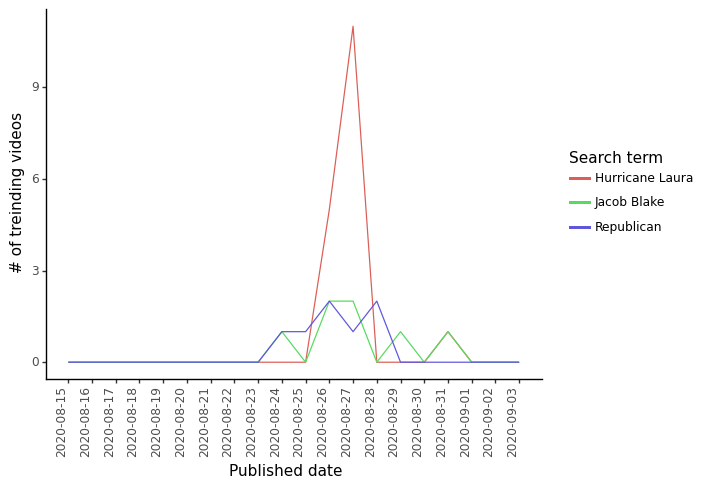

<ggplot: (7016619001)>

In [629]:
(ggplot(trailer_df, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='words'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('# of treinding videos')
 + xlab('Published date')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term')
)

In [630]:
trailer_df2 = trailer_df.copy()

In [631]:
trailer_df2['counts'] = trailer_df2['counts']*10
compare = pd.concat([trailer_df2,batman_interest])

hurricane_interest = hurricaneblake2[(hurricaneblake2['term']=='Hurricane Laura')].copy()

hurricane_interest['term'] = 'Hurricane Laura google'
hurricane_interest = hurricane_interest.reset_index(drop=True)
hurricane_interest.columns = ['datest','words','counts']
hurricane_interest['cat'] = 'interest'
hurricane_interest['color'] = 'Hurricane Laura'
compare = pd.concat([compare,hurricane_interest])


blake_interest = hurricaneblake2[(hurricaneblake2['term']=='Jacob Blake')].copy()

blake_interest['term'] = 'Jacob Blake google'
blake_interest = blake_interest.reset_index(drop=True)
blake_interest.columns = ['datest','words','counts']
blake_interest['cat'] = 'interest'
blake_interest['color'] = 'Jacob Blake'
compare = pd.concat([compare,blake_interest])

In [632]:
republican_interest = convention2[(convention2['term']=='Republican National Convention')].copy()

republican_interest['term'] = 'Republican National Convention google'
republican_interest = republican_interest.reset_index(drop=True)
republican_interest.columns = ['datest','words','counts']
republican_interest['cat'] = 'interest'
republican_interest['color'] = 'Republican National Convention'
compare = pd.concat([compare,republican_interest])

In [633]:
compare['datest'] = compare['datest'].astype(str)

In [634]:
compare.dtypes

words      object
counts    float64
datest     object
color      object
cat        object
dtype: object

In [635]:
compare['datest'] = pd.to_datetime(compare['datest'])

In [636]:
compare = compare[compare.datest > '2020-08-14']

In [637]:
compare.loc[(compare.words == 'Republican'),['words']]='Republican National Convention'
compare.loc[(compare.color == 'Republican'),['color']]='Republican National Convention'

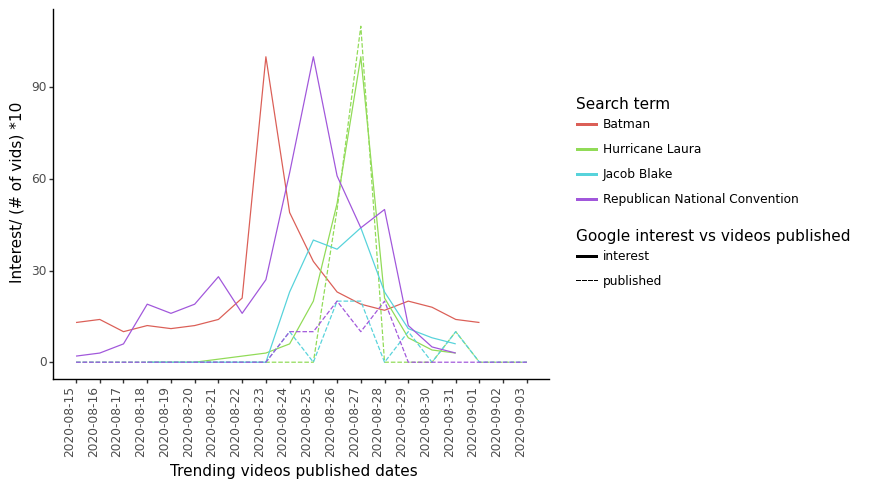

<ggplot: (7016619081)>

In [638]:
(ggplot(compare, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='color', linetype='cat'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest/ (# of vids) *10')
 + xlab('Trending videos published dates')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term', linetype = 'Google interest vs videos published')
)

In [639]:
combined['datest'] = pd.to_datetime(combined['datest'])

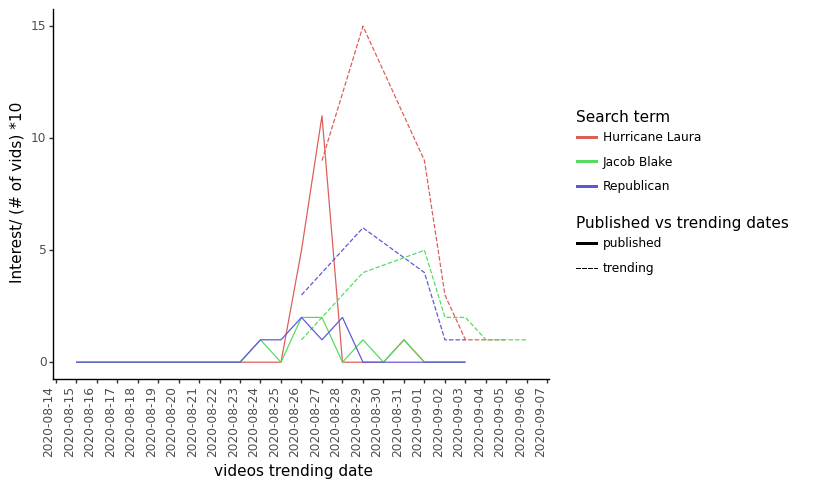

<ggplot: (7016016369)>

In [640]:
(ggplot(combined, aes(x='datest',y='counts',group='words')) 
 + geom_line(aes(color='color', linetype='cat'))
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + ylab('Interest/ (# of vids) *10')
 + xlab('videos trending date')
 + scale_x_datetime(breaks=date_breaks('1 day'))
 + labs(color='Search term',linetype = 'Published vs trending dates')
)